In [21]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 1.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.metrics import homogeneity_score
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import * 

# Import Data

In [297]:
# Breast Cancer data 
cancer_df = pd.read_csv('./data/breast-cancer-wisconsin_data.csv')

# Wine quality data
wine_df = pd.read_csv('./data/winequality-white.csv', sep=';')

print("---------------------------- Breast Cancer Data ---------------------------------------")
print(cancer_df.head())

print("---------------------------- Wine Quality Data -----------------------------------------")
print(wine_df.head())

---------------------------- Breast Cancer Data ---------------------------------------
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  No

In [298]:
print("---------------------------- Breast Cancer Data ---------------------------------------")
print(cancer_df['Class'].value_counts(normalize=True))

print("---------------------------- Wine Quality Data -----------------------------------------")
print(wine_df['quality'].value_counts(normalize=True))

---------------------------- Breast Cancer Data ---------------------------------------
2    0.655222
4    0.344778
Name: Class, dtype: float64
---------------------------- Wine Quality Data -----------------------------------------
6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64


In [299]:
# Data Pre-Processing

scaler = StandardScaler()

def process_cancer(df):
    #df['Class'].map({4: 1, 2: 0})
    df['Class'] = np.where(df['Class'] == 2, 0, 1)
    df.drop('Sample code number', axis = 1, inplace = True)
    # Dropping records with missing values of Bare Nuclei and converting it to numeric
    df = df[df['Bare Nuclei'] != '?']
    df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
    X = df.drop('Class', axis = 1)
    y = df.Class.values
    # Features scaling
    scaler.fit(X)
    X = scaler.transform(X)
    return X,y

def process_wine(df):
    df['quality'] = np.where(df['quality'] >= 6, 1, 0)
    X = df.drop('quality', axis = 1)
    y = df.quality.values
    scaler.fit(X)
    X = scaler.transform(X)
    return X,y

# cancer_X, cancer_y = process_cancer(cancer_df)
# wine_X, wine_y = process_wine(wine_df)

X, y = process_cancer(cancer_df)   # Breast Cancer data


/var/folders/49/s47xmzpx1zsg5t1_3y45j9sm0000gn/T/ipykernel_91427/3458931279.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])


In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Part 1: Clustering

# KMeans

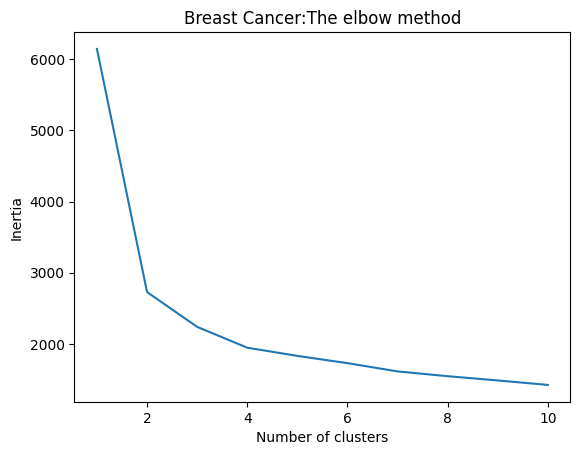

In [317]:
# The major difference between elbow and silhouette scores is that elbow only calculates the euclidean distance
# whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc.

# Elbow method 

wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Breast Cancer:The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') #within cluster sum of squares
plt.savefig('./plots/BC_P1_KM_elbow.png')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5734443556361102
For n_clusters = 3 The average silhouette_score is : 0.557792476876139
For n_clusters = 4 The average silhouette_score is : 0.5106575835969751
For n_clusters = 5 The average silhouette_score is : 0.2469801165401334
For n_clusters = 6 The average silhouette_score is : 0.24185495251124955
For n_clusters = 7 The average silhouette_score is : 0.24311759700151078
For n_clusters = 8 The average silhouette_score is : 0.24876377070212036
For n_clusters = 9 The average silhouette_score is : 0.2433093663606268
For n_clusters = 10 The average silhouette_score is : 0.25195869376909996


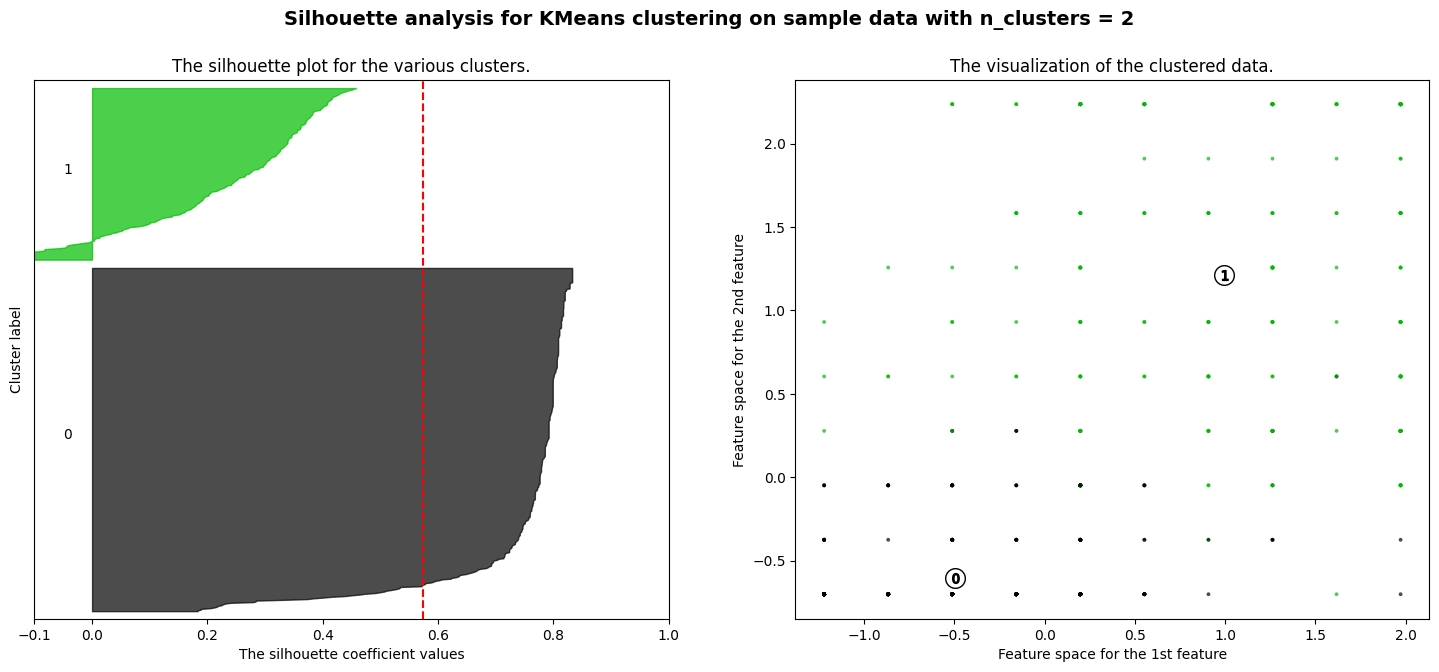

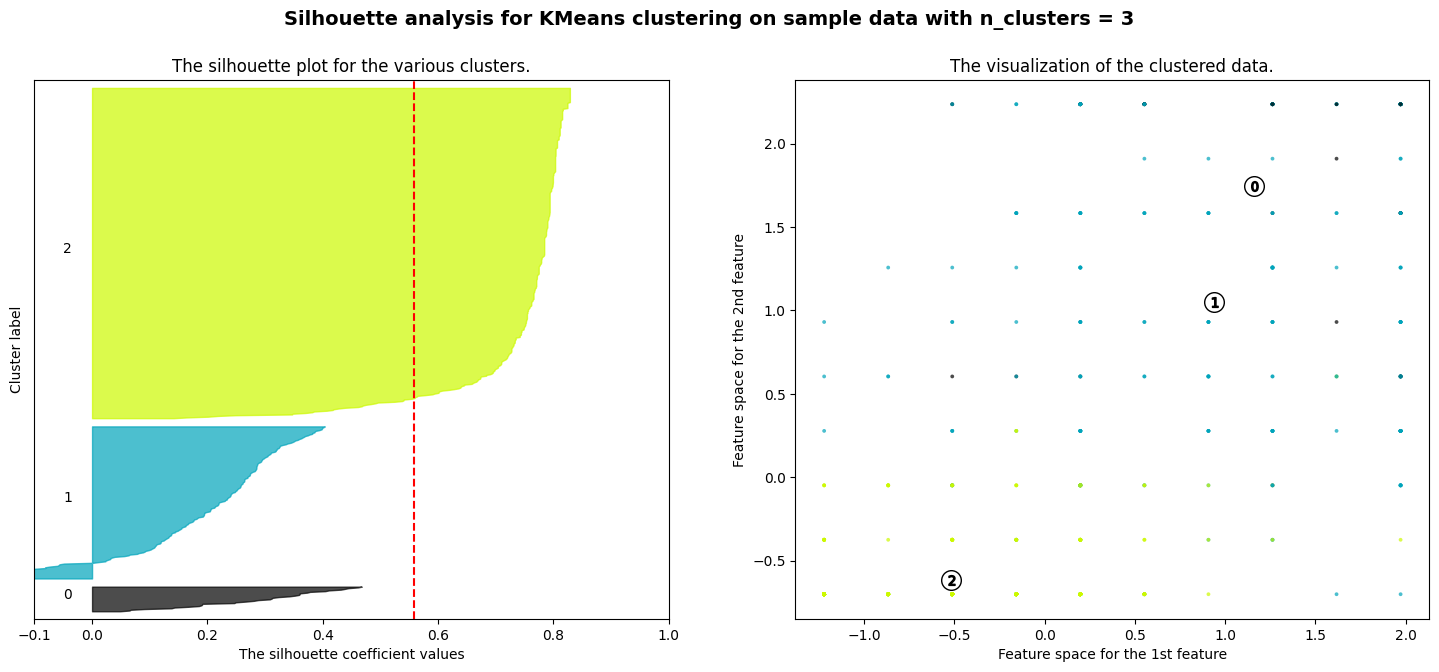

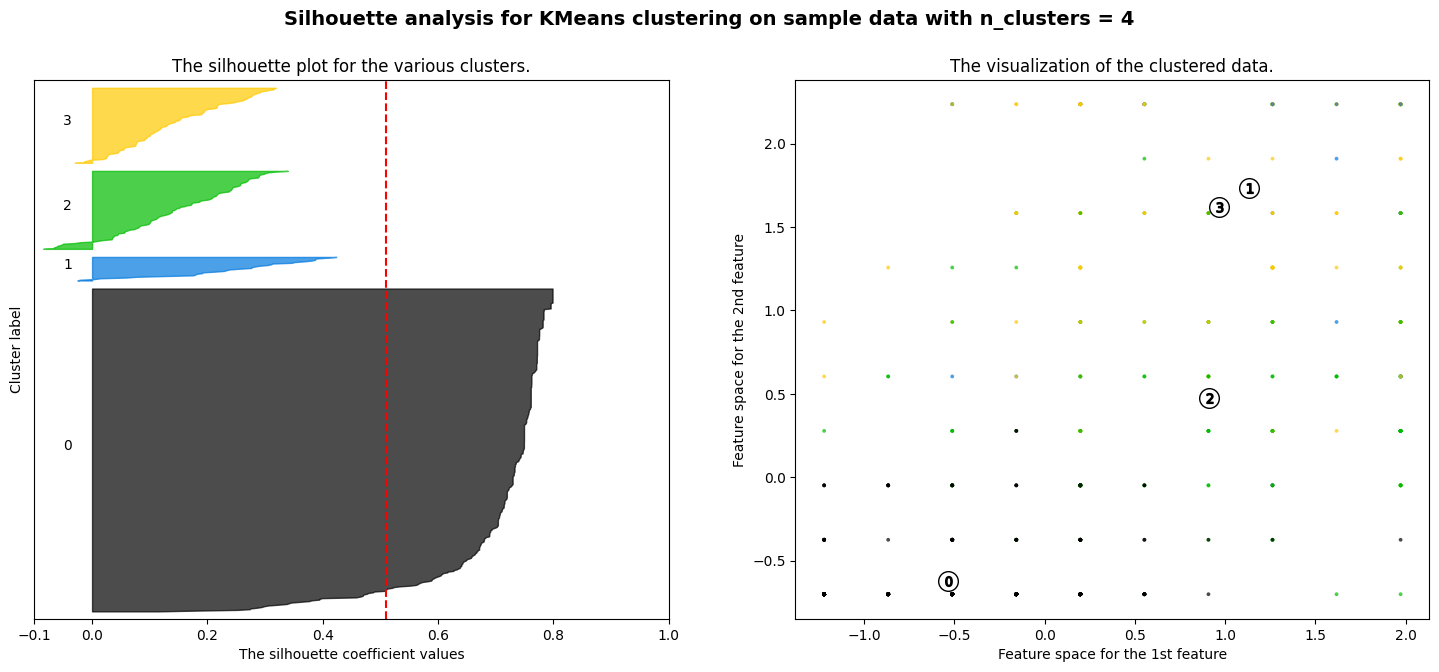

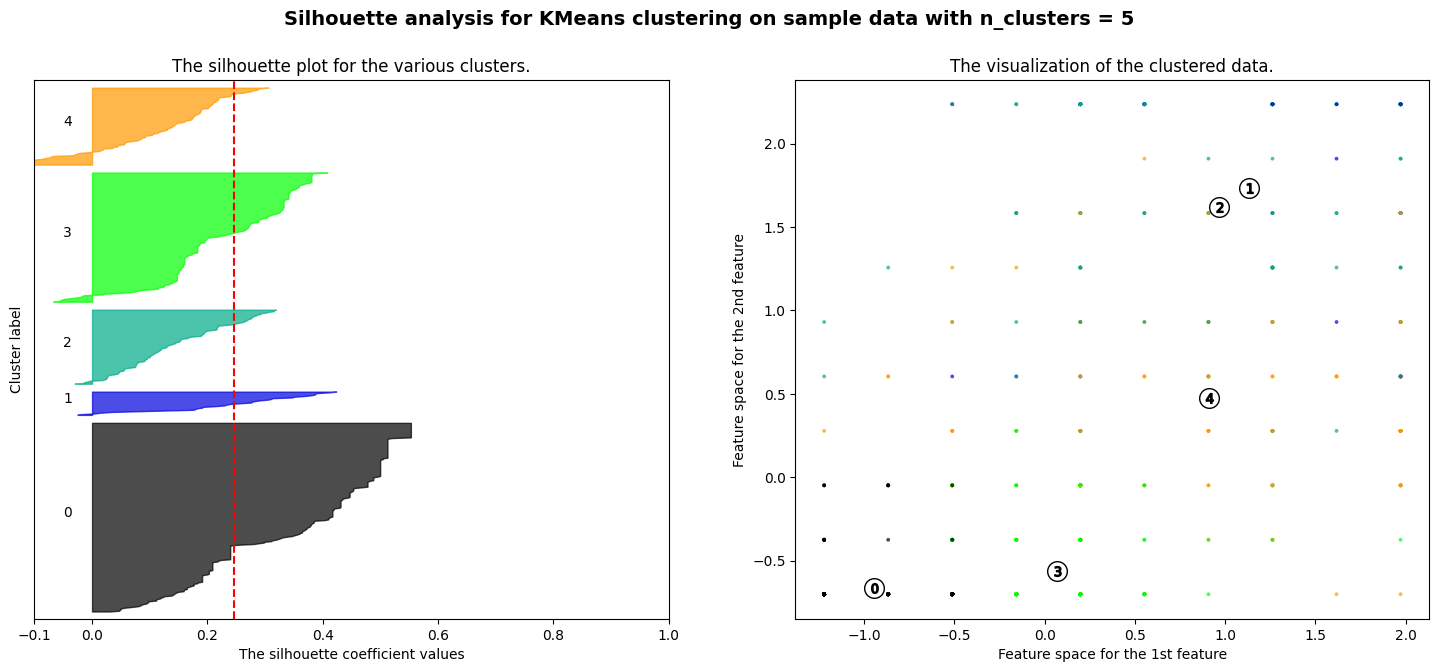

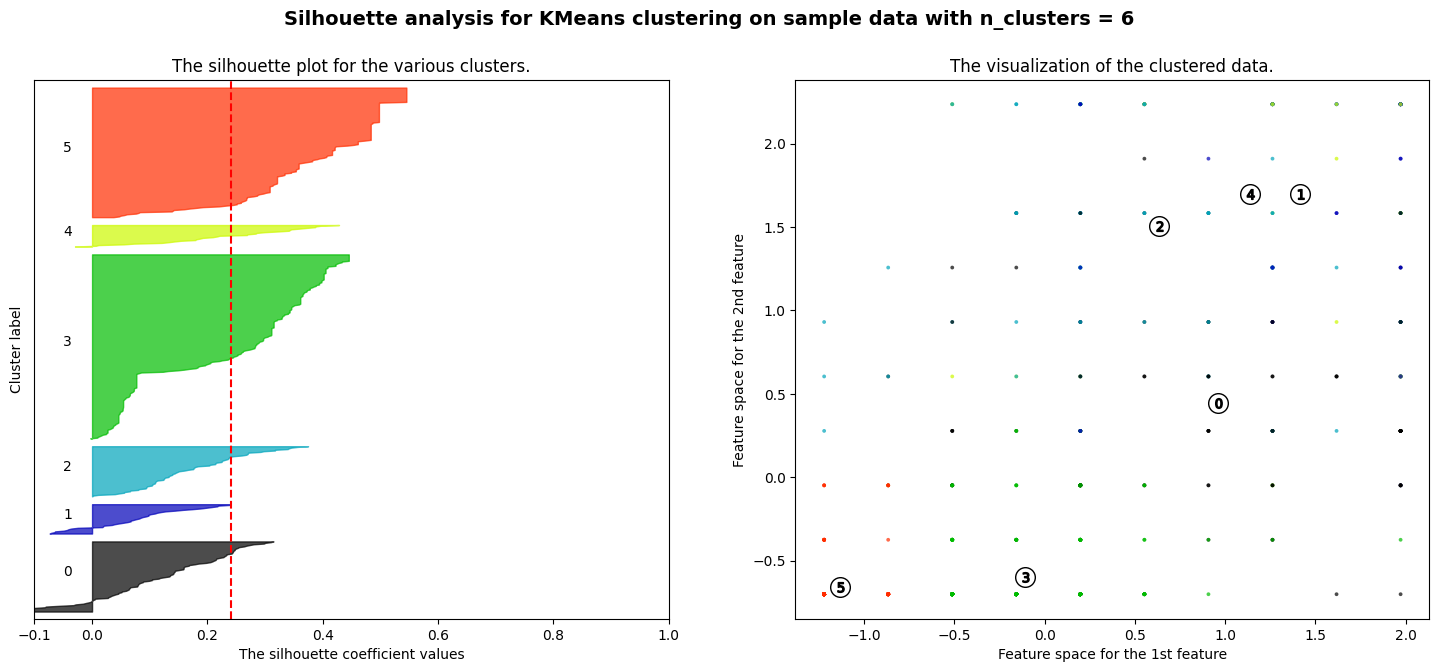

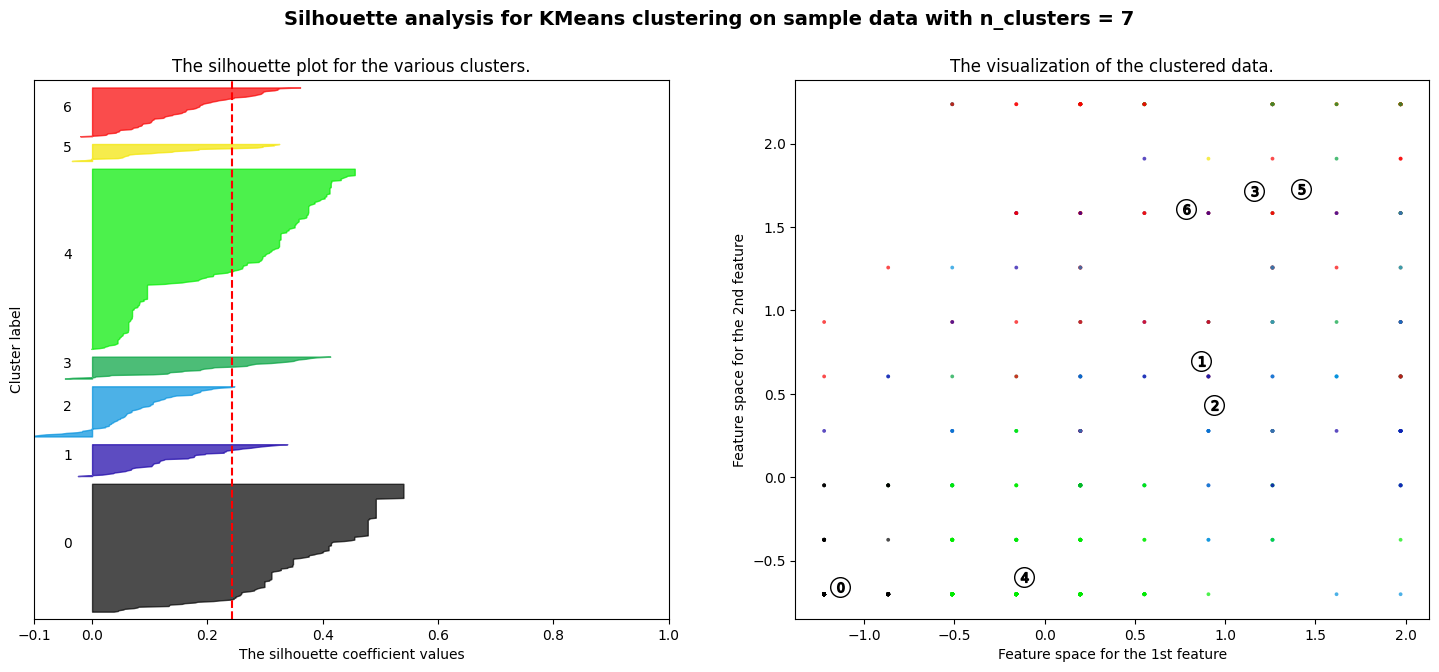

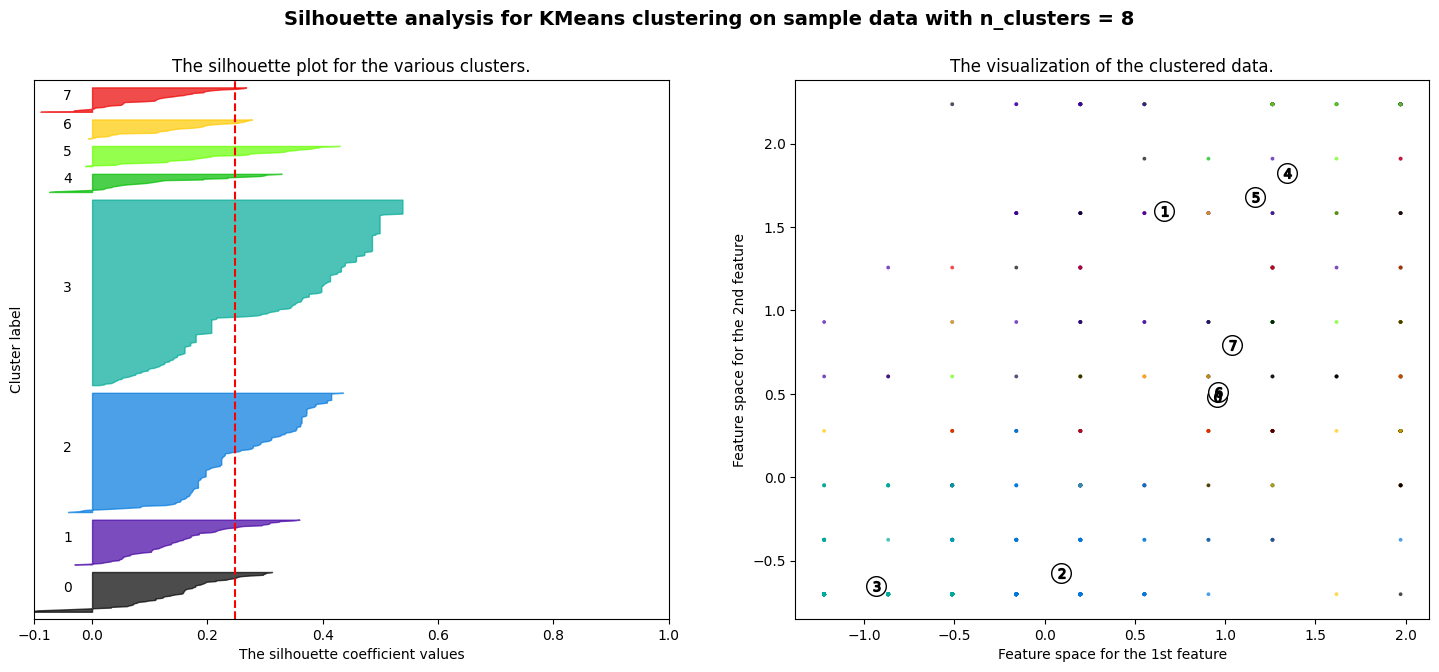

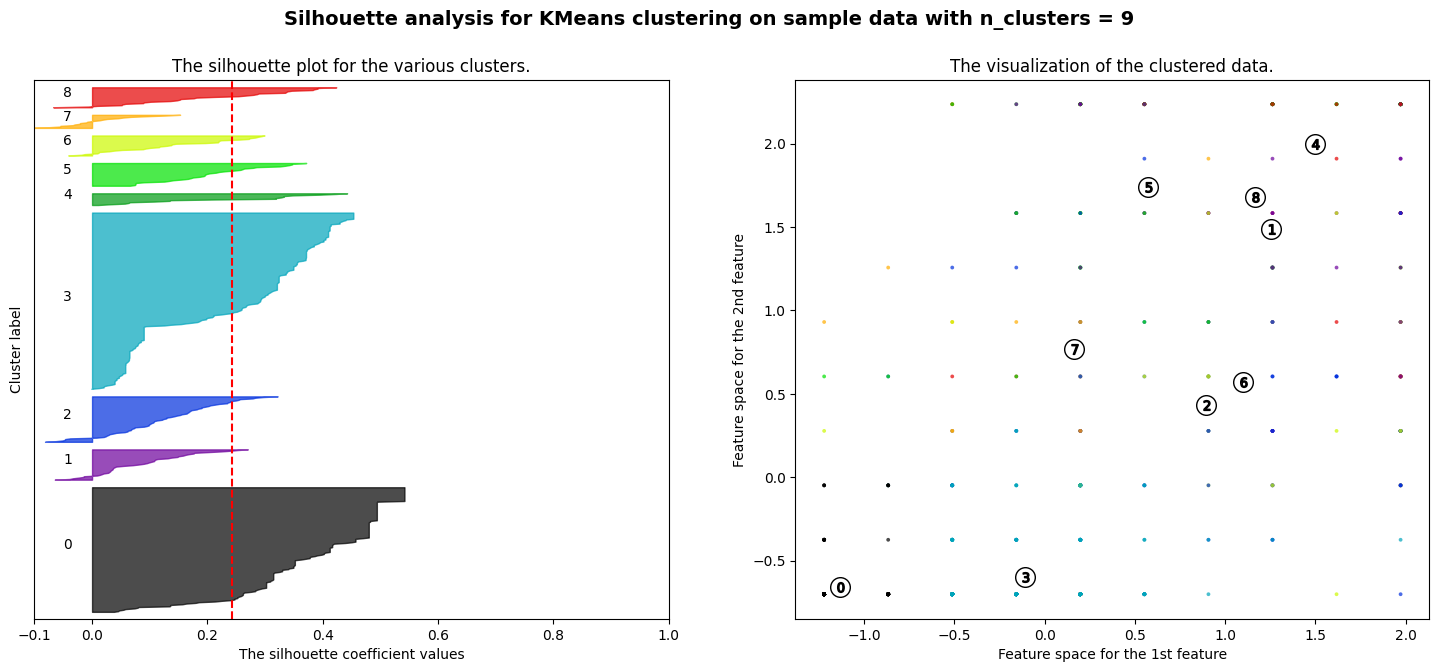

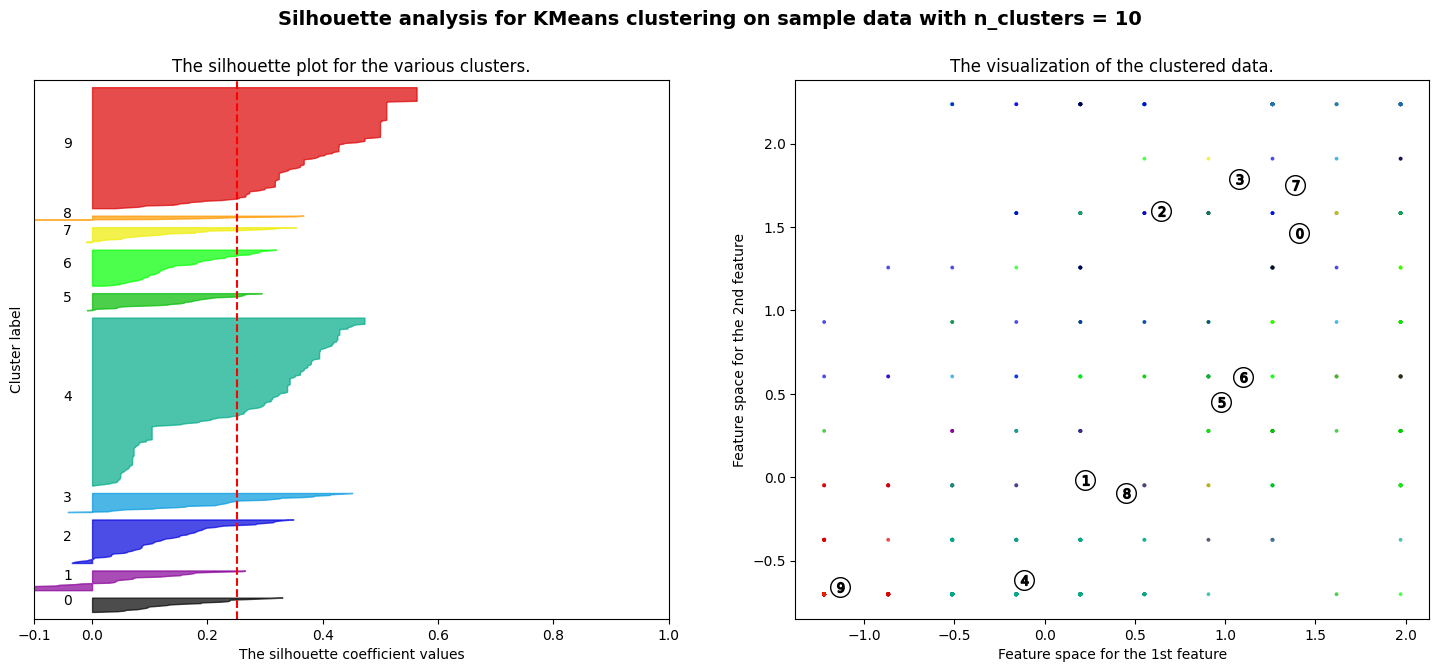

In [324]:
# silhouette score Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = np.arange(2,11,1)
sil = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

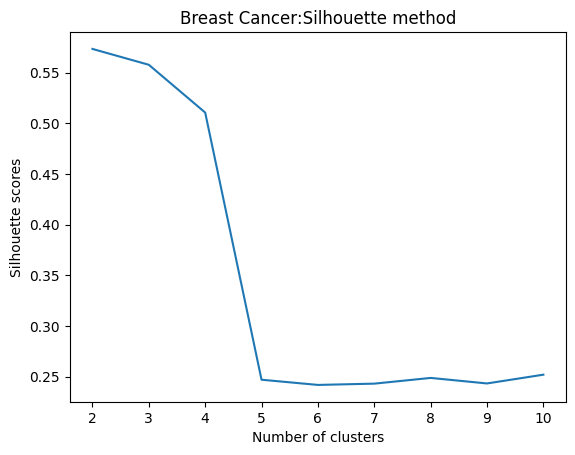

[0.5734443556361102,
 0.557792476876139,
 0.5106575835969751,
 0.2469801165401334,
 0.24185495251124955,
 0.24311759700151078,
 0.24876377070212036,
 0.2433093663606268,
 0.25195869376909996]

In [325]:

plt.plot(range(2, 11), sil)
plt.title('Breast Cancer:Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores') #within cluster sum of squares
plt.savefig('./plots/BC_P1_KM_sil.png')
plt.show()
sil

# Validating the clustering algorithm

In [334]:
homogeneity_score(KMeans(n_clusters=2, random_state=10).fit_predict(X), y)

0.7265584769374502

In [335]:
adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=10).fit_predict(X), y)

0.7202703845609025

In [342]:
print(fowlkes_mallows_score(KMeans(n_clusters=2, random_state=10).fit_predict(X), y))
print(completeness_score(KMeans(n_clusters=2, random_state=10).fit_predict(X), y))
print(v_measure_score(KMeans(n_clusters=2, random_state=10).fit_predict(X), y))

0.9210711390830721
0.714719220968439
0.7205902226604184


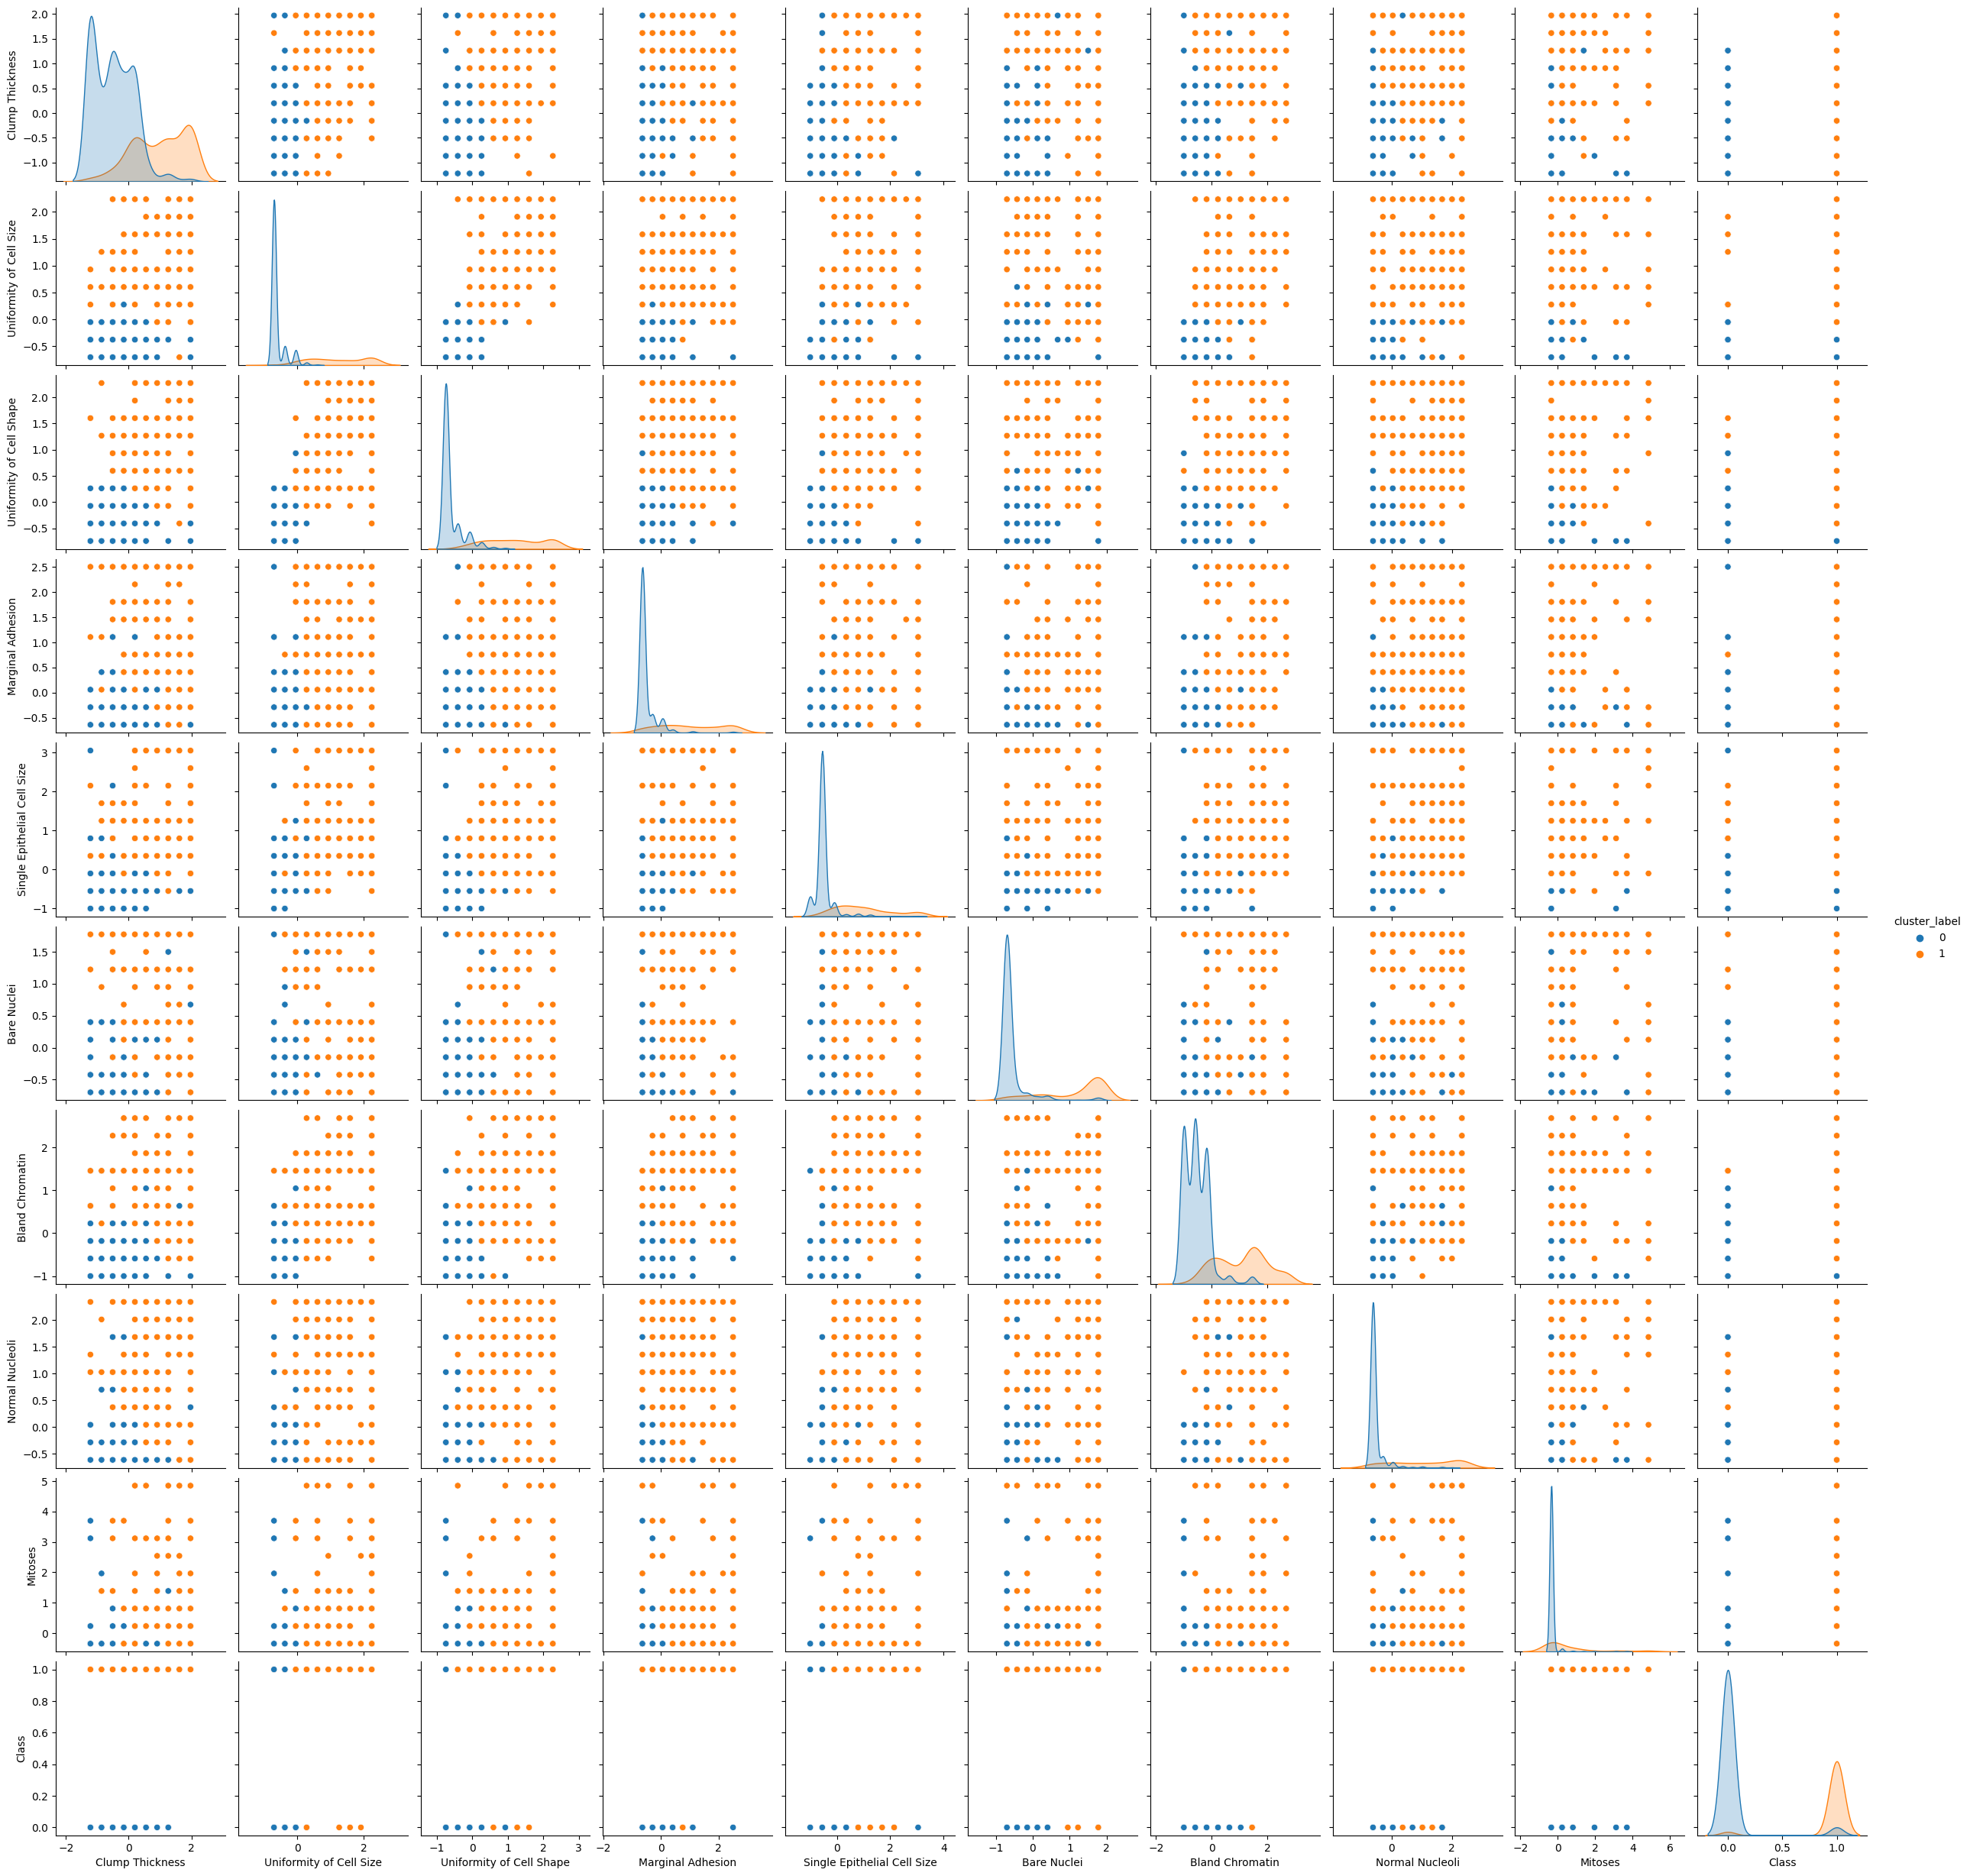

In [370]:
df = pd.DataFrame(X, columns=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])
df['Class'] = y
df['cluster_label'] = KMeans(n_clusters=2, random_state=10).fit_predict(X)
#sns.pairplot(df[['Class','cluster_label']])
#sns.pairplot(df, hue='Class')
sns.pairplot(df, hue='cluster_label')

In [381]:
print(df.groupby(['cluster_label','Class']).count())

                     Clump Thickness  Uniformity of Cell Size  \
cluster_label Class                                             
0             0                  434                      434   
              1                   21                       21   
1             0                   10                       10   
              1                  218                      218   

                     Uniformity of Cell Shape  Marginal Adhesion  \
cluster_label Class                                                
0             0                           434                434   
              1                            21                 21   
1             0                            10                 10   
              1                           218                218   

                     Single Epithelial Cell Size  Bare Nuclei  \
cluster_label Class                                             
0             0                              434          434   
     

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


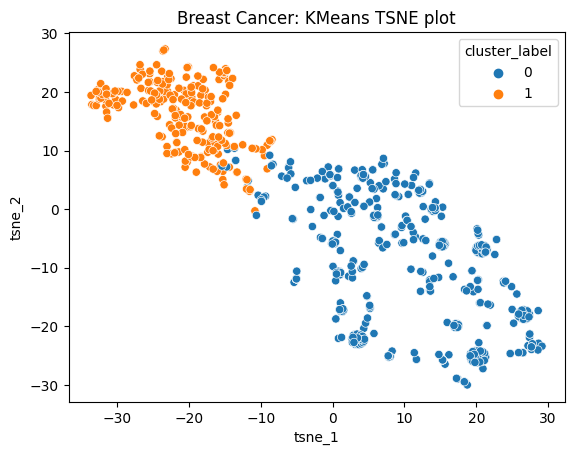

In [332]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 
                               'cluster_label': KMeans(n_clusters=2, random_state=10).fit_predict(X)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: KMeans TSNE plot')
plt.savefig('./plots/BC_KM_TSNE.png')

# EM

For n_clusters = 2 The average silhouette_score is : 0.3992981591837441
For n_clusters = 3 The average silhouette_score is : 0.33219432077391103
For n_clusters = 4 The average silhouette_score is : 0.30465213647411
For n_clusters = 5 The average silhouette_score is : 0.125428270709491
For n_clusters = 6 The average silhouette_score is : 0.27693967436433864
For n_clusters = 7 The average silhouette_score is : 0.10671207366108872
For n_clusters = 8 The average silhouette_score is : 0.035988936736600176
For n_clusters = 9 The average silhouette_score is : 0.06317636047111476
For n_clusters = 10 The average silhouette_score is : 0.055301249608762454


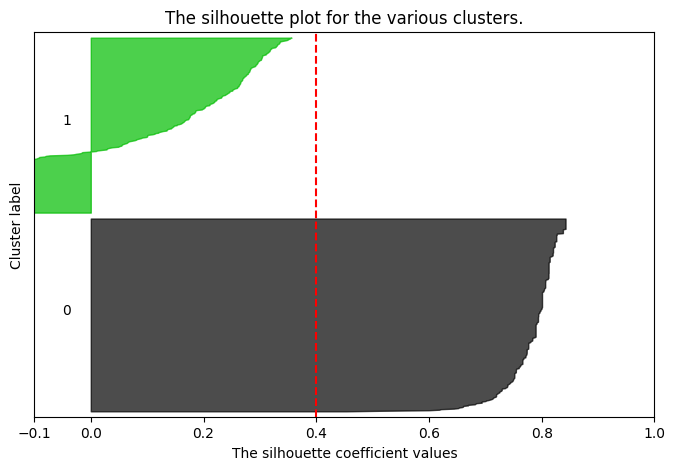

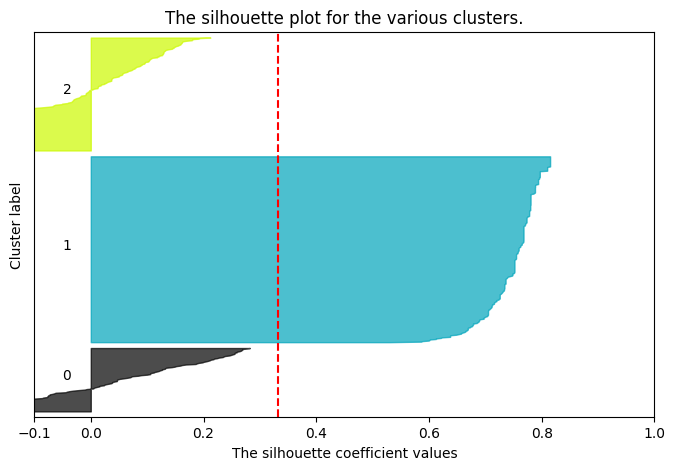

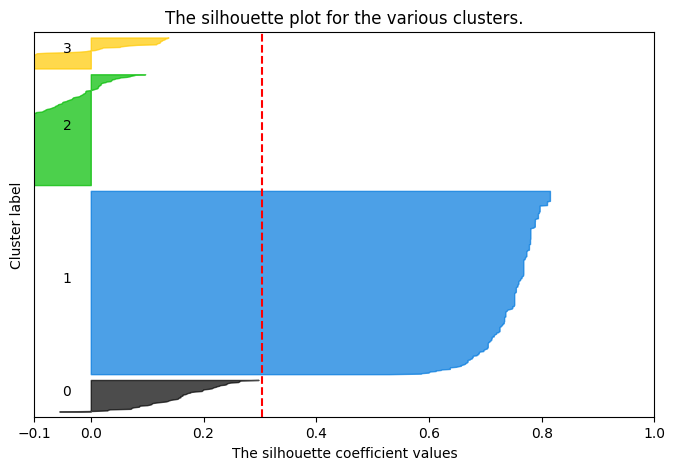

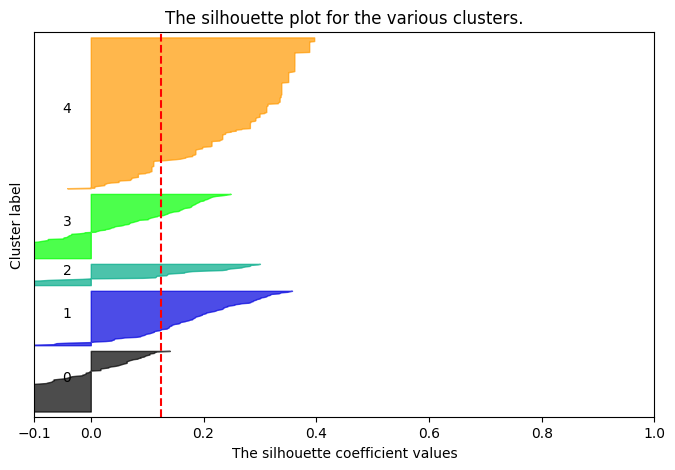

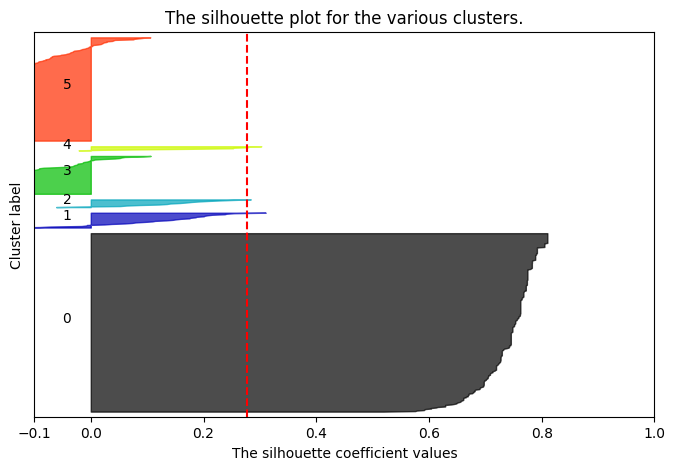

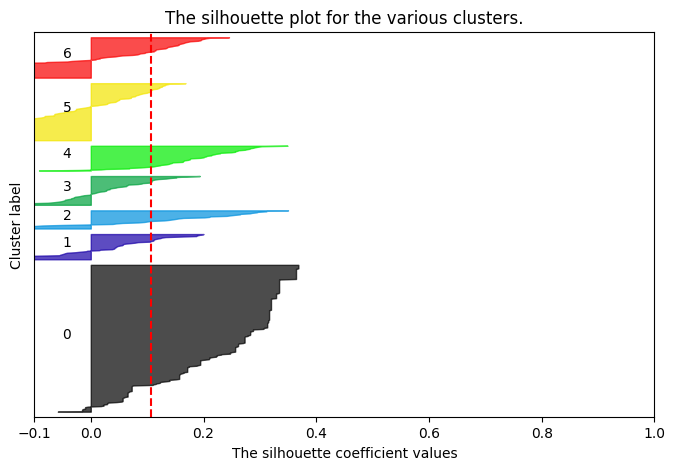

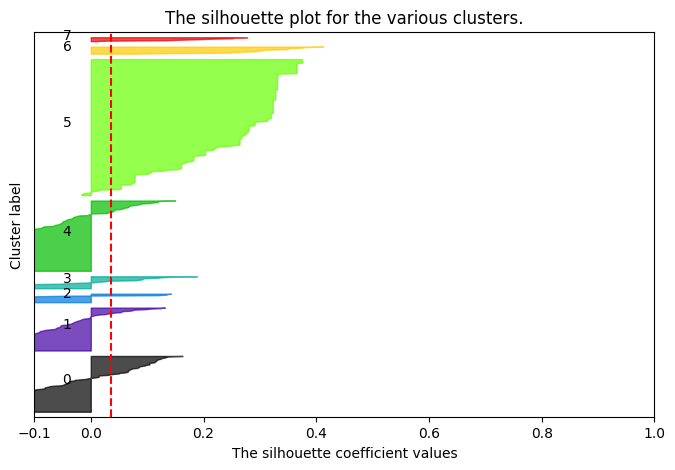

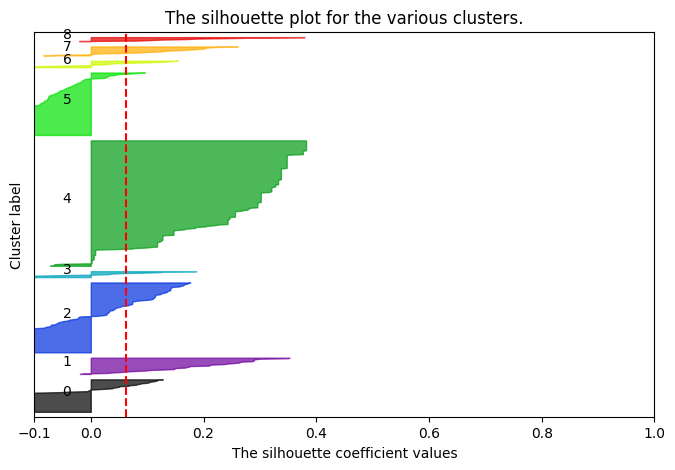

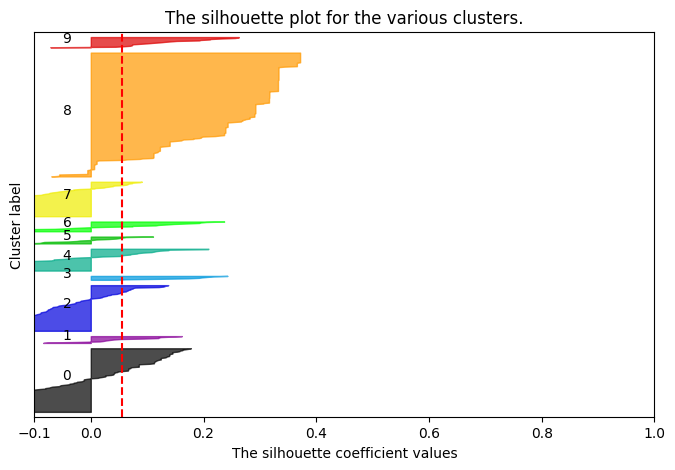

In [326]:
# silhouette score Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = np.arange(2,11,1)
sil = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(
#         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(
#         "Silhouette analysis for Gaussian Mixture on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

plt.show()

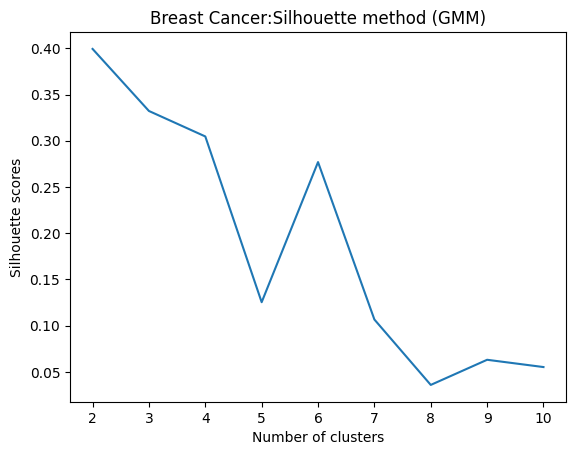

[0.3992981591837441,
 0.33219432077391103,
 0.30465213647411,
 0.125428270709491,
 0.27693967436433864,
 0.10671207366108872,
 0.035988936736600176,
 0.06317636047111476,
 0.055301249608762454]

In [327]:
plt.plot(range(2, 11), sil)
plt.title('Breast Cancer:Silhouette method (GMM)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores') #within cluster sum of squares
plt.savefig('./plots/BC_P1_GMM_sil.png')
plt.show()
sil

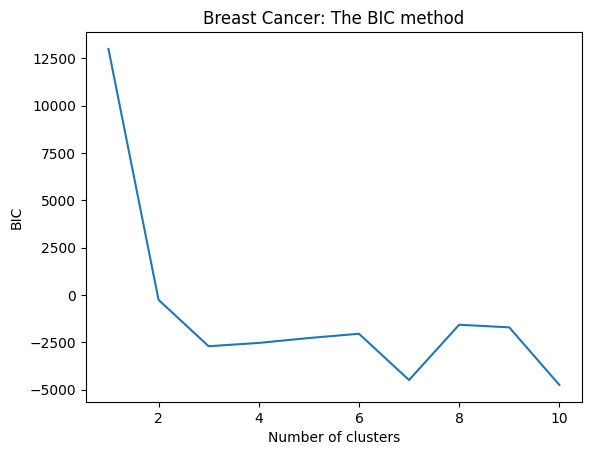

In [329]:
# BIC (Bayesian Information Criterion) method 

bic=[]

for i in range(1, 11):
    gmm = GaussianMixture(n_components = i, covariance_type='full', random_state = 2)
    gmm.fit(X)
    bic.append(gmm.bic(X))

#Plotting the results onto a line graph
plt.plot(range(1, 11), bic)
plt.title('Breast Cancer: The BIC method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC') 
plt.savefig('./plots/BC_P1_GMM_bic.png')
plt.show()

# Validating the GMM clusters

In [336]:
homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y)

0.5382326021702947

In [337]:
adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y)

0.5556594856237853

In [343]:
print(fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y))
print(completeness_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y))
print(v_measure_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y))

0.7897099645712593
0.5752937462498533
0.5561464270615064


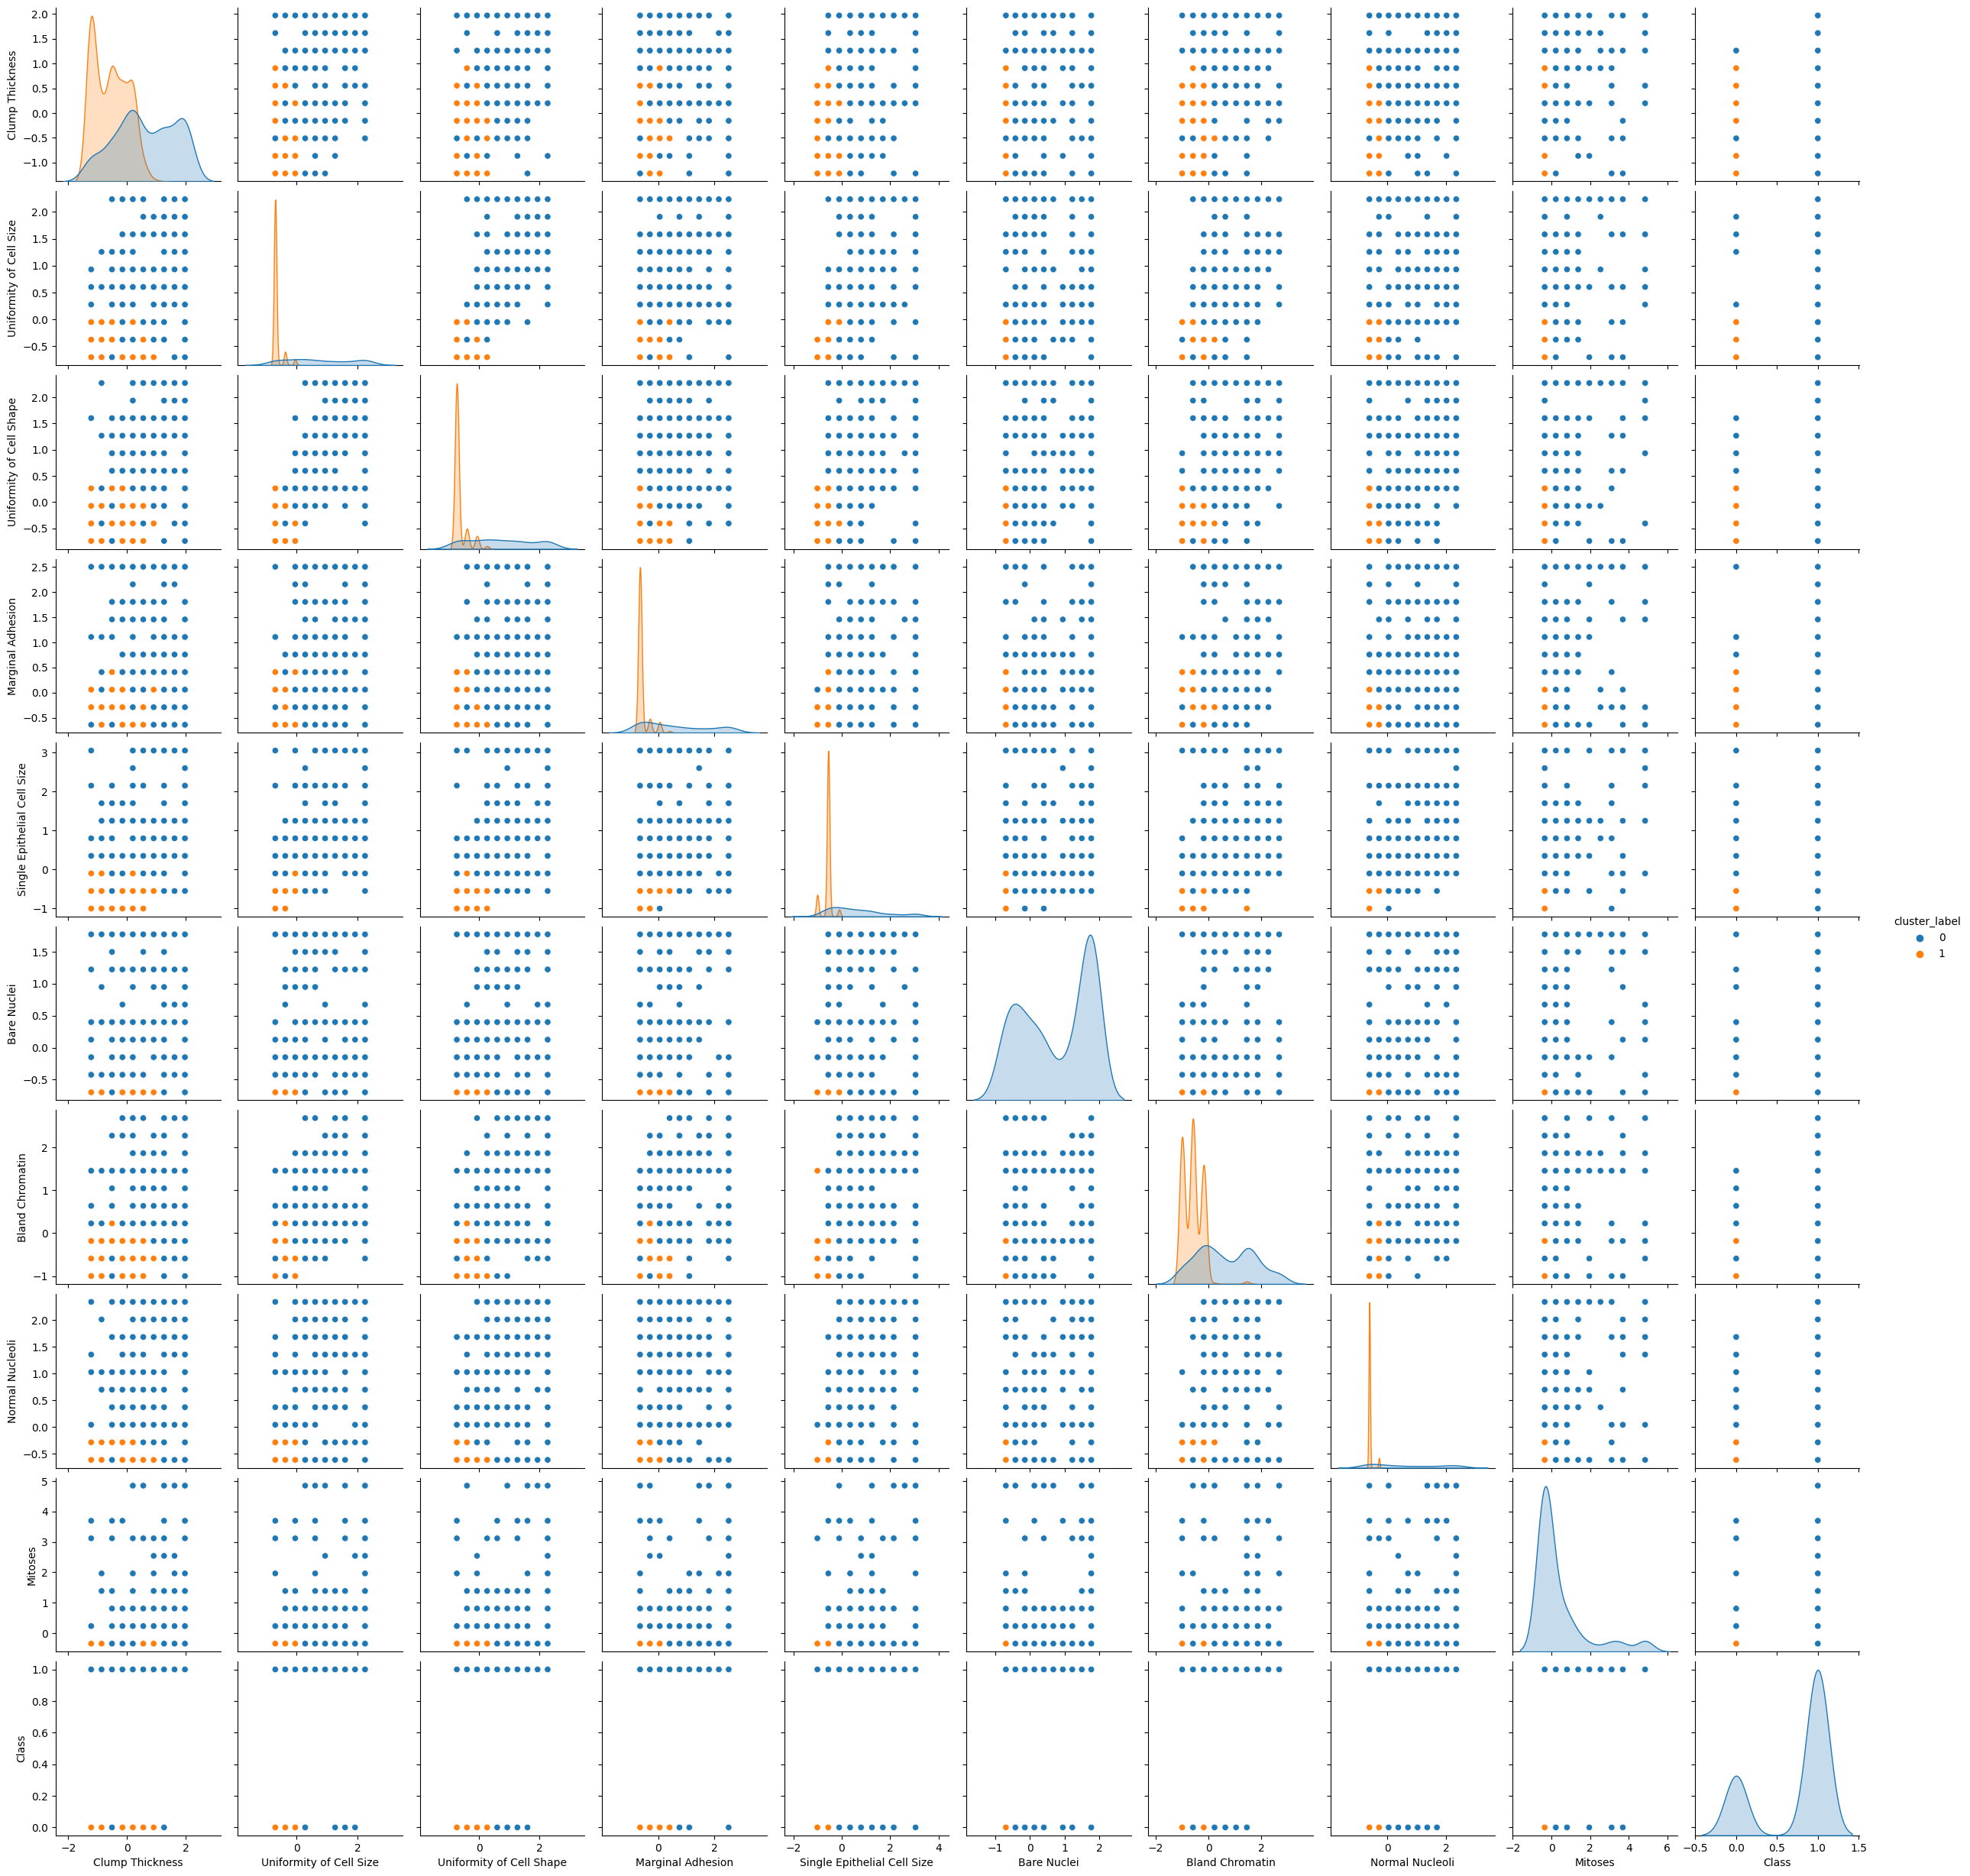

In [440]:
df = pd.DataFrame(X, columns=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])
df['Class'] = y
df['cluster_label'] = GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)
#sns.pairplot(df[['Class','cluster_label']])
#sns.pairplot(df, hue='Class')
sns.pairplot(df, hue='cluster_label')

In [441]:
print(df.groupby(['cluster_label','Class']).count())

                     Clump Thickness  Uniformity of Cell Size  \
cluster_label Class                                             
0             0                   86                       86   
              1                  239                      239   
1             0                  358                      358   

                     Uniformity of Cell Shape  Marginal Adhesion  \
cluster_label Class                                                
0             0                            86                 86   
              1                           239                239   
1             0                           358                358   

                     Single Epithelial Cell Size  Bare Nuclei  \
cluster_label Class                                             
0             0                               86           86   
              1                              239          239   
1             0                              358          358   

       

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


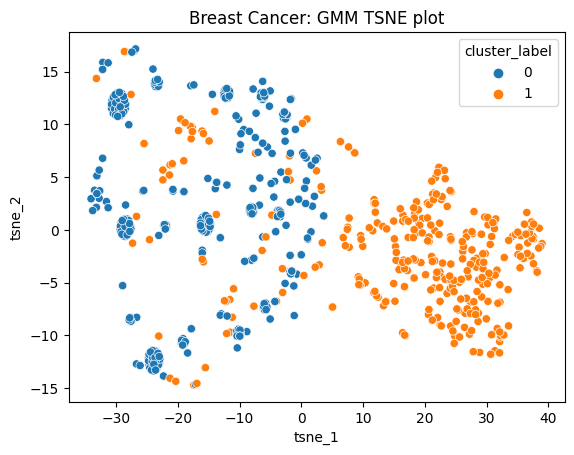

In [333]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 
                               'cluster_label': GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: GMM TSNE plot')
plt.savefig('./plots/BC_EM_TSNE.png')

# Part 2: Dimensionality Reduction

# PCA

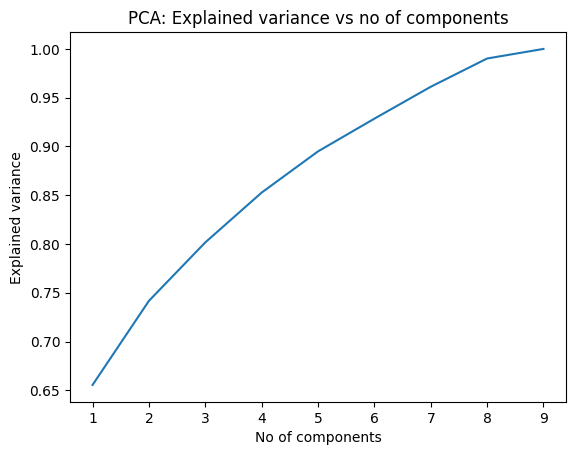

In [344]:
n_comp = np.arange(1,10,1)
exp_var = []
for i in n_comp:
    pca = PCA(n_components=i)
    pca.fit(X)
    exp_var.append(sum(pca.explained_variance_ratio_))

plt.plot(n_comp, exp_var)
plt.title('PCA: Explained variance vs no of components')
plt.xlabel('No of components')
plt.ylabel('Explained variance') 
plt.show()


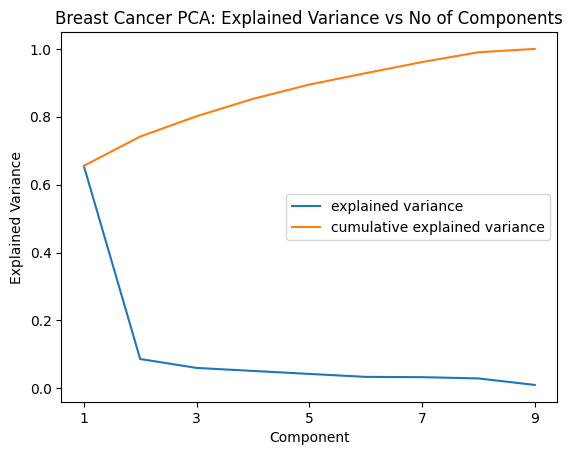

In [346]:
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='explained variance')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.title('Breast Cancer PCA: Explained Variance vs No of Components')
plt.legend()
plt.savefig('./plots/BC_P2_PCA.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


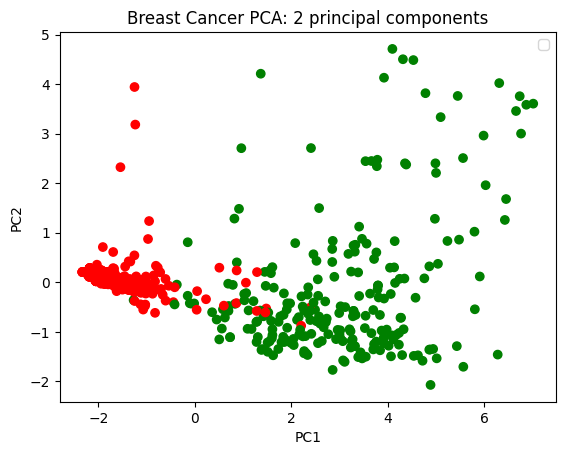

In [349]:
X_pca = PCA(n_components=2).fit_transform(X)
color= ['red' if l == 0 else 'green' for l in y]
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=color, label = '_bad_name')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Breast Cancer PCA: 2 principal components")
plt.legend()
plt.show()

In [350]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 5)

# ICA

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/anurag/opt/miniconda3/l

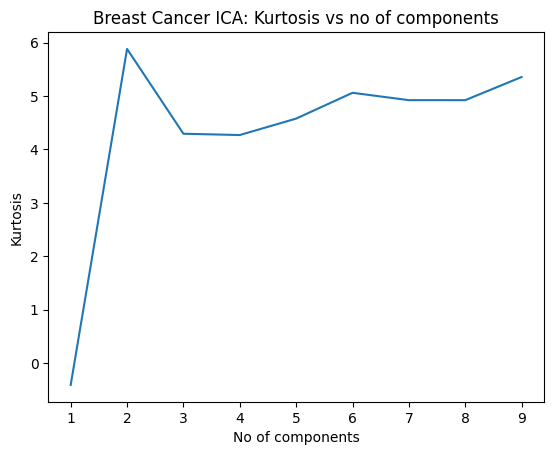

In [358]:
n_comp = np.arange(1,10,1)
kurt = []
for i in n_comp:
    ica = FastICA(n_components=i).fit_transform(X)
    kurt.append(np.mean(scipy.stats.kurtosis(ica)))

plt.plot(n_comp, kurt)
plt.title('Breast Cancer ICA: Kurtosis vs no of components')
plt.xlabel('No of components')
plt.ylabel('Kurtosis') 
plt.savefig('./plots/BC_P2_ICA.png')
plt.show()

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


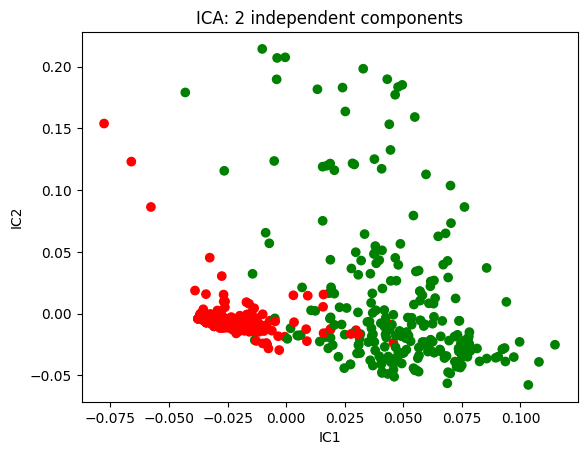

In [352]:
X_ica = FastICA(n_components=2).fit_transform(X)
color= ['red' if l == 0 else 'green' for l in y]
plot = plt.scatter(X_ica[:,0], X_ica[:,1], c=color)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.title("ICA: 2 independent components")
plt.show()

In [353]:
X_ica_train, X_ica_test, y_ica_train, y_ica_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 5)

# Random Projections

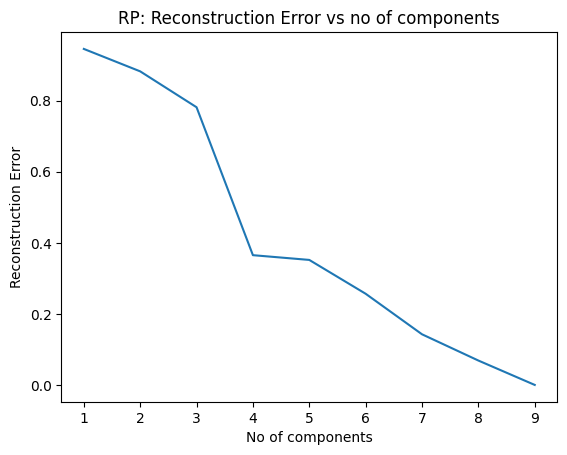

In [77]:
# reconstruction_error = []
# for i in range(1,10):
#     rp = GaussianRandomProjection(n_components=i).fit(X)
#     w = rp.components_
#     p = pinv(w)
#     recon = ((p@w)@(X.T)).T
#     reconstruction_error.append(mean_squared_error(X,recon))
    
# plt.plot(np.arange(1,10,1), reconstruction_error)
# plt.title('RP: Reconstruction Error vs no of components')
# plt.xlabel('No of components')
# plt.ylabel('Reconstruction Error') 

# plt.show()    

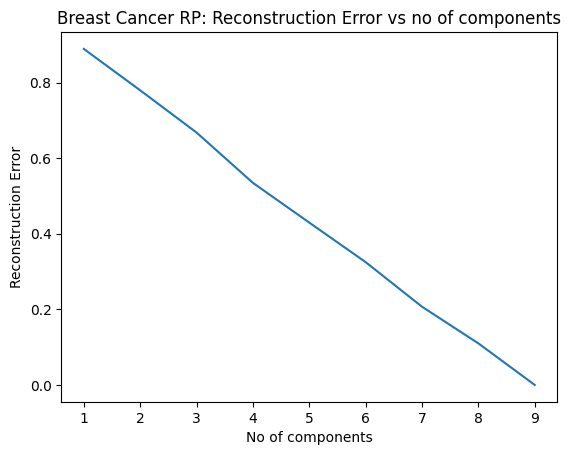

In [359]:
reconstruction_error = []
for i in range(1,10):
    recon_inner = []
    for j in range(1,100):
        rp = GaussianRandomProjection(n_components=i).fit(X)
        w = rp.components_
        p = pinv(w)
        recon = ((p@w)@(X.T)).T
        recon_inner.append(mean_squared_error(X,recon))
    reconstruction_error.append(np.mean(recon_inner))
    
plt.plot(np.arange(1,10,1), reconstruction_error)
plt.title('Breast Cancer RP: Reconstruction Error vs no of components')
plt.xlabel('No of components')
plt.ylabel('Reconstruction Error') 
plt.savefig('./plots/BC_P2_RP.png')
plt.show()    

In [360]:
X_RP = GaussianRandomProjection(n_components=4).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, y, test_size = 0.2, random_state = 5)

# Feature Selection of Choice

In [362]:
# Reference: https://scikit-learn.org/stable/modules/feature_selection.html

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X,y)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_fs = model.transform(X)
print(X_fs.shape)

[0.0565001  0.14604454 0.13418462 0.07400372 0.07044357 0.28122814
 0.10018184 0.12724586 0.01016762]
(683, 4)


In [363]:
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y, test_size = 0.2, random_state = 5)

# Part 3: Clustering with Dimensionality Reduction

In [364]:
def kmeans_comparison(df):
    cluster_size = np.arange(1,11,1)
    
    # Elbow & Silhouette method
    inertia_list = []
    sil_scores = []
    for i in cluster_size:
        cluster_algo = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 11)
        cluster_labels = cluster_algo.fit_predict(df)
        inertia_list.append(cluster_algo.inertia_)
        if i > 1:
            sil_scores.append(silhouette_score(df, cluster_labels))
        
    return inertia_list,sil_scores
    
baseline_val = kmeans_comparison(X)
pca_val = kmeans_comparison(X_pca)
ica_val = kmeans_comparison(X_ica)
rp_val = kmeans_comparison(X_RP)
fs_val = kmeans_comparison(X_fs)

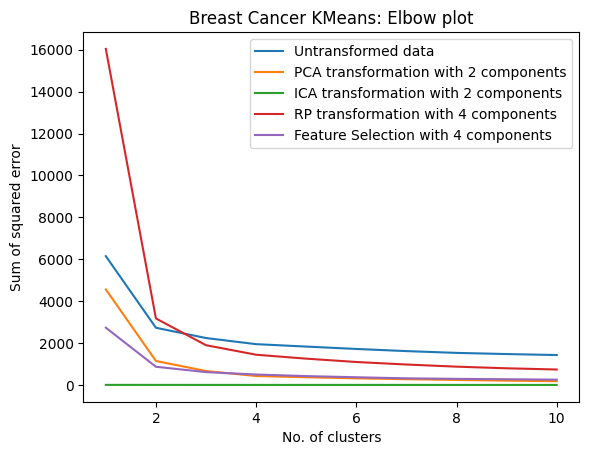

In [365]:
# Elbow plot
plt.plot(np.arange(1,11,1), baseline_val[0], label = 'Untransformed data')
plt.plot(np.arange(1,11,1), pca_val[0], label = 'PCA transformation with 2 components')
plt.plot(np.arange(1,11,1), ica_val[0], label = 'ICA transformation with 2 components')
plt.plot(np.arange(1,11,1), rp_val[0], label = 'RP transformation with 4 components')
plt.plot(np.arange(1,11,1), fs_val[0], label = 'Feature Selection with 4 components')
plt.title('Breast Cancer KMeans: Elbow plot')
plt.xlabel('No. of clusters')
plt.ylabel('Sum of squared error')
plt.legend()
plt.savefig('./plots/BC_P3_KM_elbow.png')
plt.show()

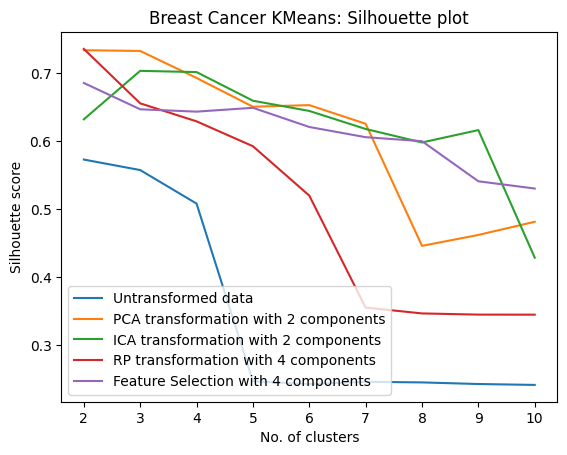

In [366]:
# Silhouette plot
plt.plot(np.arange(2,11,1), baseline_val[1], label = 'Untransformed data')
plt.plot(np.arange(2,11,1), pca_val[1], label = 'PCA transformation with 2 components')
plt.plot(np.arange(2,11,1), ica_val[1], label = 'ICA transformation with 2 components')
plt.plot(np.arange(2,11,1), rp_val[1], label = 'RP transformation with 4 components')
plt.plot(np.arange(2,11,1), fs_val[1], label = 'Feature Selection with 4 components')
plt.title('Breast Cancer KMeans: Silhouette plot')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.legend()
plt.savefig('./plots/BC_P3_KM_sil.png')
plt.show()

In [367]:
def gmm_comparison(df):
    cluster_size = np.arange(1,11,1)
        
    # BIC & Silhouette method
    bic_list = []
    sil_scores = []
    for i in cluster_size:
        cluster_algo = GaussianMixture(n_components=i, covariance_type='full')
        cluster_labels = cluster_algo.fit_predict(df)
        bic_list.append(cluster_algo.bic(df))
        if i > 1:
            sil_scores.append(silhouette_score(df, cluster_labels))
    
    #print(sil_scores)
    return bic_list,sil_scores
    
baseline_val = gmm_comparison(X)
pca_val = gmm_comparison(X_pca)
ica_val = gmm_comparison(X_ica)
rp_val = gmm_comparison(X_RP)
fs_val = gmm_comparison(X_fs)

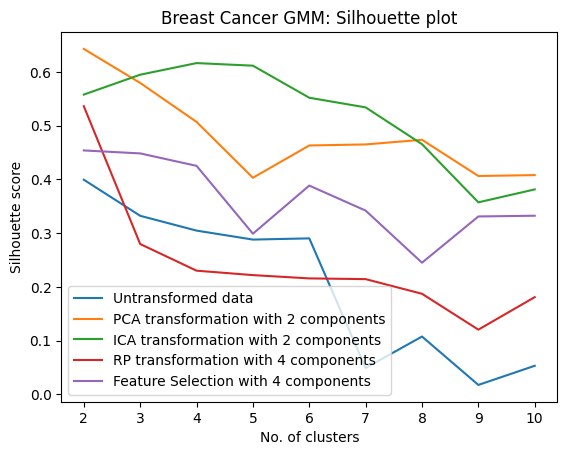

In [368]:
# Silhouette plot
plt.plot(np.arange(2,11,1), baseline_val[1], label = 'Untransformed data')
plt.plot(np.arange(2,11,1), pca_val[1], label = 'PCA transformation with 2 components')
plt.plot(np.arange(2,11,1), ica_val[1], label = 'ICA transformation with 2 components')
plt.plot(np.arange(2,11,1), rp_val[1], label = 'RP transformation with 4 components')
plt.plot(np.arange(2,11,1), fs_val[1], label = 'Feature Selection with 4 components')
plt.title('Breast Cancer GMM: Silhouette plot')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.legend()
plt.savefig('./plots/BC_P3_EM_sil.png')
plt.show()

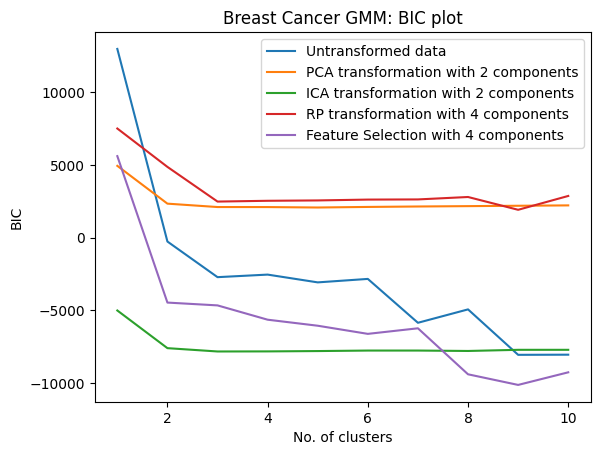

In [369]:
# BIC plot
plt.plot(np.arange(1,11,1), baseline_val[0], label = 'Untransformed data')
plt.plot(np.arange(1,11,1), pca_val[0], label = 'PCA transformation with 2 components')
plt.plot(np.arange(1,11,1), ica_val[0], label = 'ICA transformation with 2 components')
plt.plot(np.arange(1,11,1), rp_val[0], label = 'RP transformation with 4 components')
plt.plot(np.arange(1,11,1), fs_val[0], label = 'Feature Selection with 4 components')
plt.title('Breast Cancer GMM: BIC plot')
plt.xlabel('No. of clusters')
plt.ylabel('BIC')
plt.legend()
plt.savefig('./plots/BC_P3_EM_bic.png')
plt.show()

# KMeans on un-transformed data

In [113]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X), y))

Homogeneity score: 0.7383882353606255
Adjusted Mutual Information: 0.7331780920437878


# KMeans on PCA transformed data

In [382]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_pca), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_pca), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_pca), y))

Homogeneity score: 0.7506524770590141
Adjusted Mutual Information: 0.7465295398617557
Fowlkes Mallows score: 0.93057272256475


In [443]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_pca), KMeans(n_clusters=2, random_state=10).fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_pca), KMeans(n_clusters=2, random_state=10).fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_pca), KMeans(n_clusters=2, random_state=10).fit_predict(X)))

Homogeneity score: 0.95367390536892
Adjusted Mutual Information: 0.9507860652379649
Fowlkes Mallows score: 0.9893830264793106


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


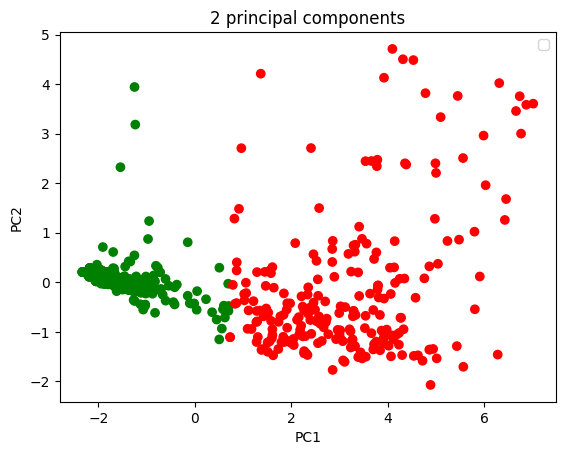

In [383]:
color= ['red' if l == 0 else 'green' for l in KMeans(n_clusters=2, random_state=12).fit_predict(X_pca)]
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=color)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2 principal components")
plt.show()

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


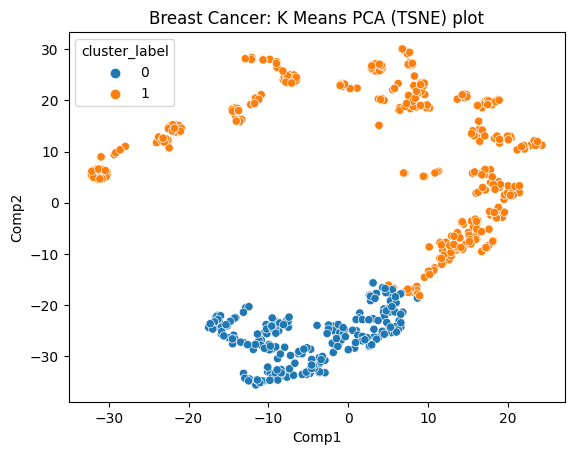

In [421]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_pca)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': KMeans(n_clusters=2, random_state=12).fit_predict(X_pca)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: K Means PCA (TSNE) plot')
plt.savefig('./plots/BC_P3_KM_PCA.png')

# KMeans on ICA transformed data

In [385]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=3, random_state=12).fit_predict(X_ica), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=3, random_state=12).fit_predict(X_ica), y))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(KMeans(n_clusters=3, random_state=12).fit_predict(X_ica), y))

Homogeneity score: 0.6174110648904464
Adjusted Mutual Information: 0.6782073427520383
Fowlkes Mallows Score: 0.9100892992153544


In [444]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=3, random_state=12).fit_predict(X_ica), KMeans(n_clusters=2, random_state=12).fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=3, random_state=12).fit_predict(X_ica), KMeans(n_clusters=2, random_state=12).fit_predict(X)))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(KMeans(n_clusters=3, random_state=12).fit_predict(X_ica), KMeans(n_clusters=2, random_state=12).fit_predict(X)))

Homogeneity score: 0.6875968263941592
Adjusted Mutual Information: 0.7569961681858842
Fowlkes Mallows Score: 0.9380548804351999


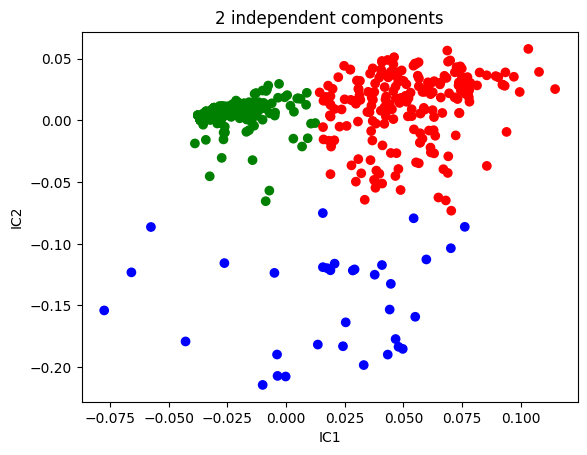

In [132]:
color= ['red' if l == 0 else 'blue' if l == 1 else 'green' for l in KMeans(n_clusters=3, random_state=12).fit_predict(X_ica)]
plot = plt.scatter(X_ica[:,0], X_ica[:,1], c=color)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.title("2 independent components")
plt.show()

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


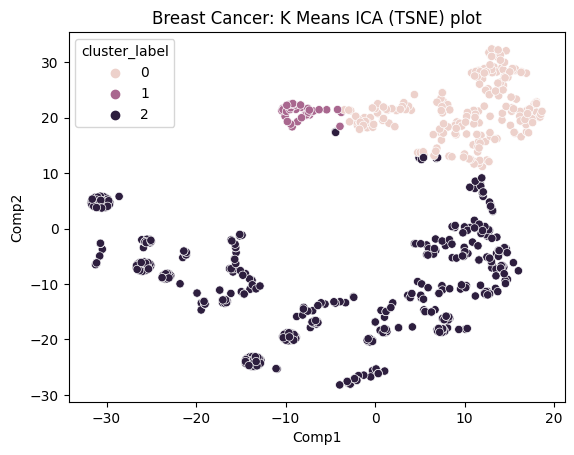

In [411]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_ica)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': KMeans(n_clusters=3, random_state=12).fit_predict(X_ica)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: K Means ICA (TSNE) plot')
plt.savefig('./plots/BC_P3_KM_ICA.png')

# KMeans on Random Projections transformed data

In [387]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_RP), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_RP), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_RP), y))

Homogeneity score: 0.7378118391257276
Adjusted Mutual Information: 0.7296539119073453
Fowlkes Mallows score: 0.9237333156114109


In [445]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_RP), KMeans(n_clusters=2, random_state=12).fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_RP), KMeans(n_clusters=2, random_state=12).fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_RP), KMeans(n_clusters=2, random_state=12).fit_predict(X)))

Homogeneity score: 0.8740072345060992
Adjusted Mutual Information: 0.8664258835808107
Fowlkes Mallows score: 0.9661872564113565


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


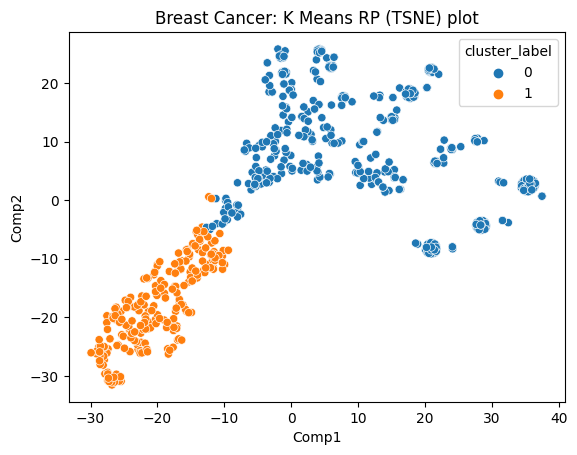

In [412]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_RP)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': KMeans(n_clusters=2, random_state=12).fit_predict(X_RP)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: K Means RP (TSNE) plot')
plt.savefig('./plots/BC_P3_KM_RP.png')

# KMeans on Feature Selection transformed data

In [388]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_fs), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_fs), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_fs), y))

Homogeneity score: 0.7378118391257276
Adjusted Mutual Information: 0.7296539119073453
Fowlkes Mallows score: 0.9237333156114109


In [446]:
print("Homogeneity score:",homogeneity_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_fs), KMeans(n_clusters=2, random_state=12).fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_fs), KMeans(n_clusters=2, random_state=12).fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(KMeans(n_clusters=2, random_state=12).fit_predict(X_fs), KMeans(n_clusters=2, random_state=12).fit_predict(X)))

Homogeneity score: 0.8356889702996588
Adjusted Mutual Information: 0.8283895836730369
Fowlkes Mallows score: 0.9560338043898784


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


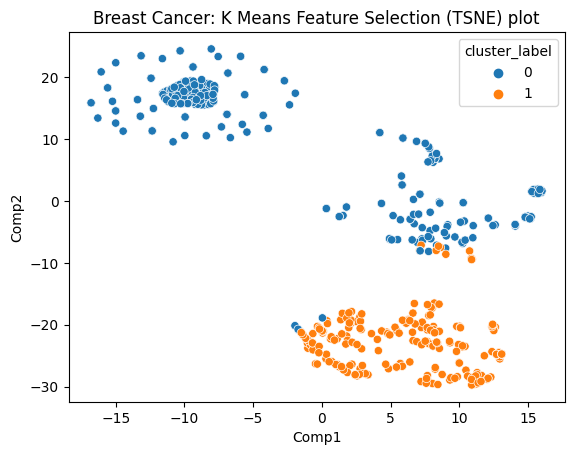

In [413]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_fs)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': KMeans(n_clusters=2, random_state=12).fit_predict(X_fs)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: K Means Feature Selection (TSNE) plot')
plt.savefig('./plots/BC_P3_KM_FS.png')

# EM on un-transformed data

In [124]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X), y))

Homogeneity score: 0.5382326021702947
Adjusted Mutual Information: 0.5556594856237853


# EM on PCA transformed data

In [395]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca),y))

Homogeneity score: 0.6770467197368593
Adjusted Mutual Information: 0.6932760466107838
Fowlkes Mallows score: 0.8789609539878537


In [447]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca),GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))

Homogeneity score: 0.6932706102270123
Adjusted Mutual Information: 0.6868222964199908
Fowlkes Mallows score: 0.8783653329405936


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


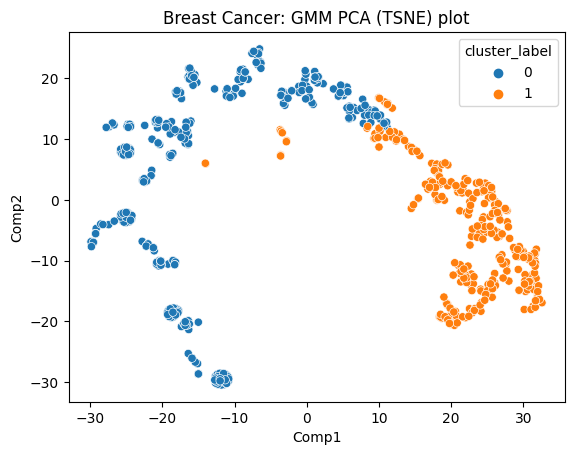

In [414]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_pca)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_pca)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: GMM PCA (TSNE) plot')
plt.savefig('./plots/BC_P3_EM_PCA.png')

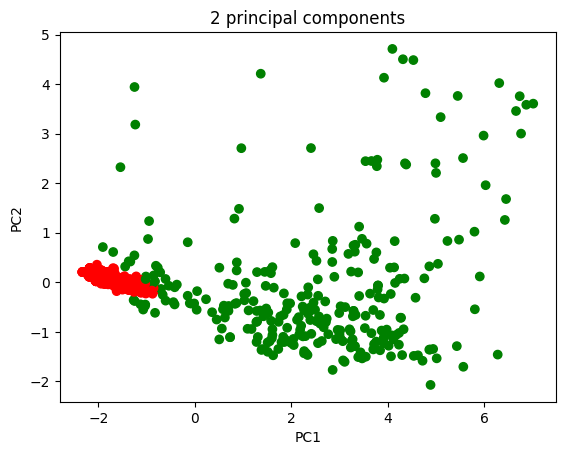

In [133]:
color= ['red' if l == 0 else 'green' for l in GaussianMixture(n_components=2, covariance_type='full', random_state=12).fit_predict(X_pca)]
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=color)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2 principal components")
plt.show()

# EM on ICA transformed data

In [404]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica),y))

Homogeneity score: 0.43558324484929034
Adjusted Mutual Information: 0.5396723091715805
Fowlkes Mallows score: 0.8241198957201121


In [448]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica),GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))

Homogeneity score: 0.46348851176841654
Adjusted Mutual Information: 0.558331327741844
Fowlkes Mallows score: 0.7865870260075001


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


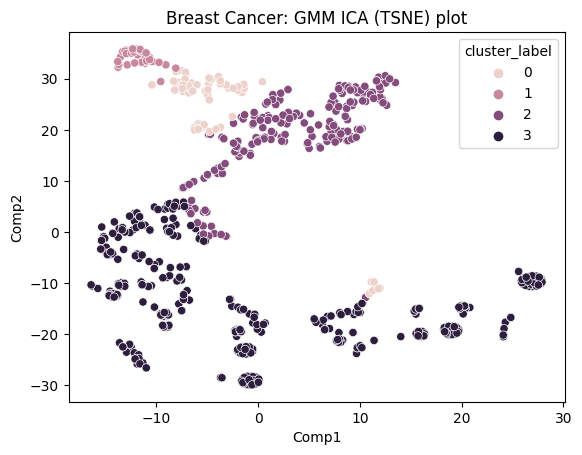

In [416]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_ica)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': GaussianMixture(n_components=4, covariance_type='full').fit_predict(X_ica)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: GMM ICA (TSNE) plot')
plt.savefig('./plots/BC_P3_EM_ICA.png')

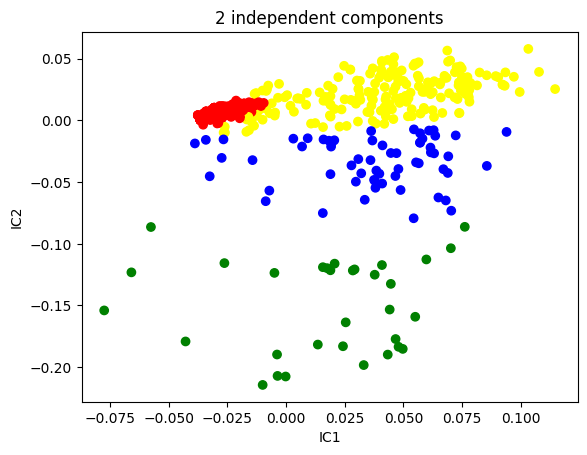

In [134]:
color= ['red' if l == 0 else 'blue' if l == 1 else 'yellow' if l == 2 else 'green' for l in GaussianMixture(n_components=4, covariance_type='full', random_state=12).fit_predict(X_ica)]
plot = plt.scatter(X_ica[:,0], X_ica[:,1], c=color)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.title("2 independent components")
plt.show()

# EM on Random Projections transformed data

In [403]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP),y))

Homogeneity score: 0.550137148673843
Adjusted Mutual Information: 0.5677209175932391
Fowlkes Mallows score: 0.7982850499543189


In [449]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP),GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))

Homogeneity score: 0.6010220554326767
Adjusted Mutual Information: 0.6003221312890623
Fowlkes Mallows score: 0.8543820904074427


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


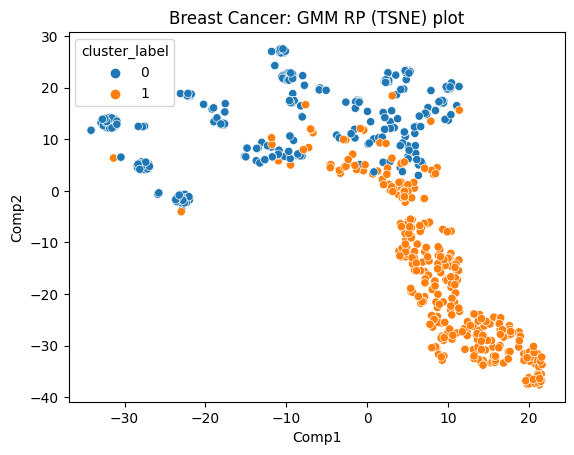

In [417]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_RP)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_RP)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: GMM RP (TSNE) plot')
plt.savefig('./plots/BC_P3_EM_RP.png')

# EM on Feature Selection transformed data

In [405]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs), y))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs), y))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs),y))

Homogeneity score: 0.48697590757372633
Adjusted Mutual Information: 0.503040294687587
Fowlkes Mallows score: 0.7510239632226745


In [450]:
print("Homogeneity score:",homogeneity_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Adjusted Mutual Information:",adjusted_mutual_info_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))
print("Fowlkes Mallows score:", fowlkes_mallows_score(GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs), GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)))

Homogeneity score: 0.6807288287107959
Adjusted Mutual Information: 0.6809515388245663
Fowlkes Mallows score: 0.8869529924617241


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


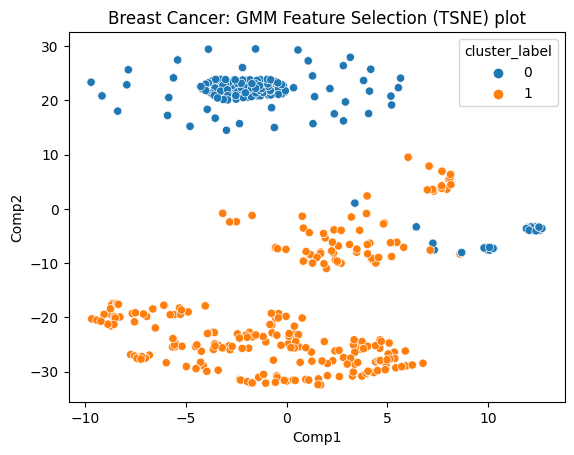

In [418]:
# Reference: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
tsne_result = TSNE(2).fit_transform(X_fs)
tsne_result_df = pd.DataFrame({'Comp1': tsne_result[:,0], 'Comp2': tsne_result[:,1], 
                               'cluster_label': GaussianMixture(n_components=2, covariance_type='full').fit_predict(X_fs)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Comp1', y='Comp2', hue='cluster_label', data=tsne_result_df, ax=ax)
plt.title('Breast Cancer: GMM Feature Selection (TSNE) plot')
plt.savefig('./plots/BC_P3_EM_FS.png')


# Part 4: Neural Network with Dimensionality Reduction

# NN on un-transformed data

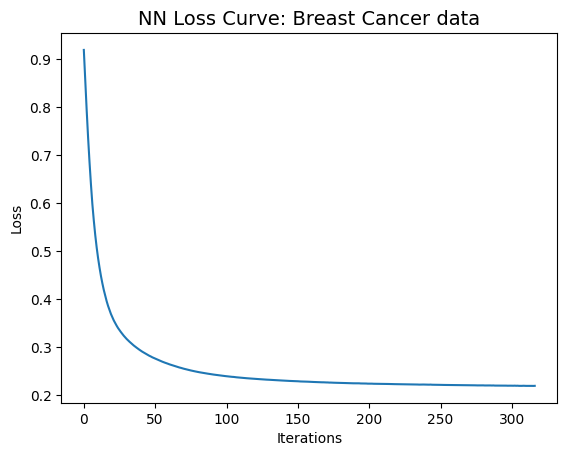

In [422]:
nn_clf1 = MLPClassifier(random_state = 35, hidden_layer_sizes = (7,2), max_iter = 2000, 
                       alpha = 10, learning_rate_init = 0.01, solver = 'adam')
#X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)
nn_clf1.fit(X_train, y_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer data", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P4_orig_loss.png')
plt.show()


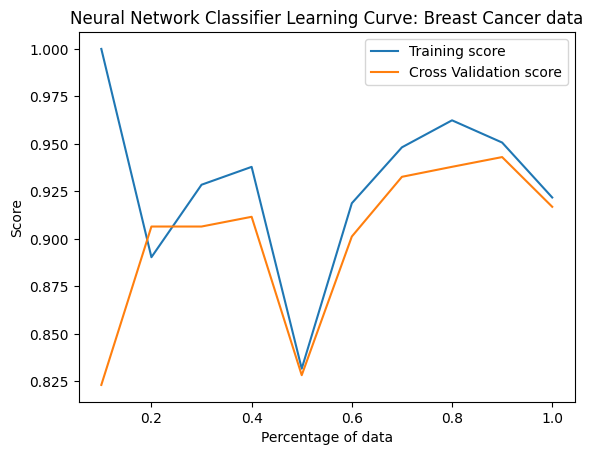

In [423]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 33, hidden_layer_sizes = (7,2), max_iter = 2000, alpha = 10, learning_rate_init = 0.01)
nn_clf.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_clf, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Breast Cancer data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P4_orig_LC.png')
plt.show()

In [138]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 33, hidden_layer_sizes = (7,2), max_iter = 2000, 
                       alpha = 10, learning_rate_init = 0.01)
init_time = time.time()
nn_clf.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = nn_clf.predict(X_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_pred,y_test))

Training time in seconds: 0.1612529754638672
Query time in seconds: 0.0007410049438476562
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



# NN on PCA transformed data

In [249]:
cnn = MLPClassifier(random_state=12345, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,15,1), "learning_rate_init": [0.001,0.01,1]}
cnn_best = GridSearchCV(cnn, param_grid=param_grid, scoring = 'recall',cv=5,n_jobs=4)

start_time = time.time()
cnn_best.fit(X_pca_train, y_pca_train)
end_time = time.time()
time_gs = end_time-start_time
print("Best params for neural network:",cnn_best.best_params_)
print("Time to train for Grid Search:",time_gs)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate_init': 1}
Time to trainfor Grid Search: 45.41502904891968


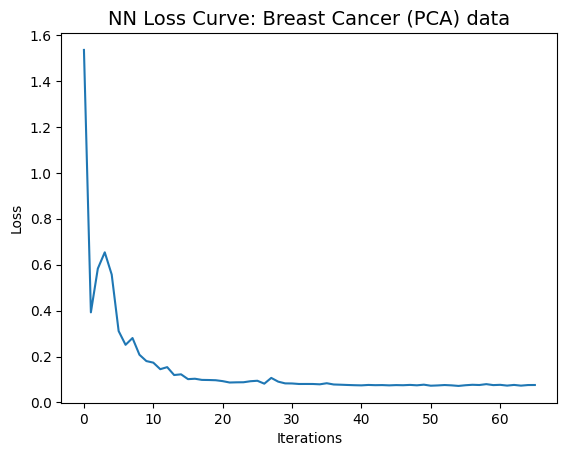

In [424]:
nn_clf1 = MLPClassifier(random_state = 32, hidden_layer_sizes = (10), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
#X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)
nn_clf1.fit(X_pca_train, y_pca_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer (PCA) data", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P4_PCA_loss.png')
plt.show()



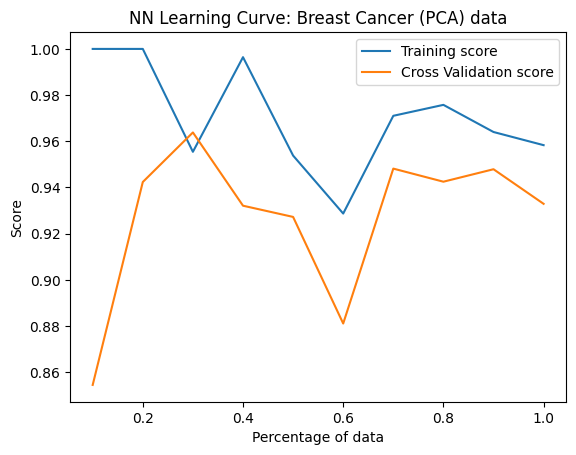

In [425]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 32, hidden_layer_sizes = (10), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1)
nn_clf.fit(X_pca_train, y_pca_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_clf, X_pca_train, y_pca_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('NN Learning Curve: Breast Cancer (PCA) data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P4_PCA_LC.png')
plt.show()

In [258]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 32, hidden_layer_sizes = (10), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1)
init_time = time.time()
nn_clf.fit(X_pca_train, y_pca_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pca_pred = nn_clf.predict(X_pca_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_pca_pred,y_pca_test))

Training time in seconds: 0.05346369743347168
Query time in seconds: 0.0005640983581542969
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.96      0.98        49

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



# NN on ICA transformed data

In [260]:
cnn = MLPClassifier(random_state=12345, max_iter=5000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,15,1), "learning_rate_init": [0.001,0.01,1]}
cnn_best = GridSearchCV(cnn, param_grid=param_grid, scoring = 'recall',cv=5,n_jobs=4)

start_time = time.time()
cnn_best.fit(X_ica_train, y_ica_train)
end_time = time.time()
time_gs = end_time-start_time
print("Best params for neural network:",cnn_best.best_params_)
print("Time to train for Grid Search:",time_gs)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 14, 'learning_rate_init': 1}
Time to train for Grid Search: 74.11443400382996


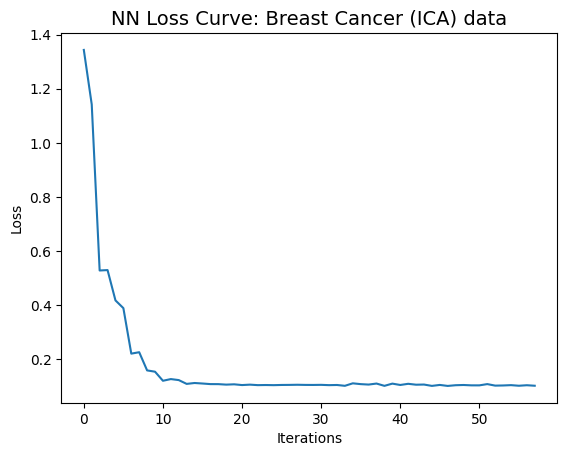

In [426]:
nn_clf1 = MLPClassifier(random_state = 37, hidden_layer_sizes = (14), max_iter = 5000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
#X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)
nn_clf1.fit(X_ica_train, y_ica_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer (ICA) data", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P4_ICA_loss.png')
plt.show()



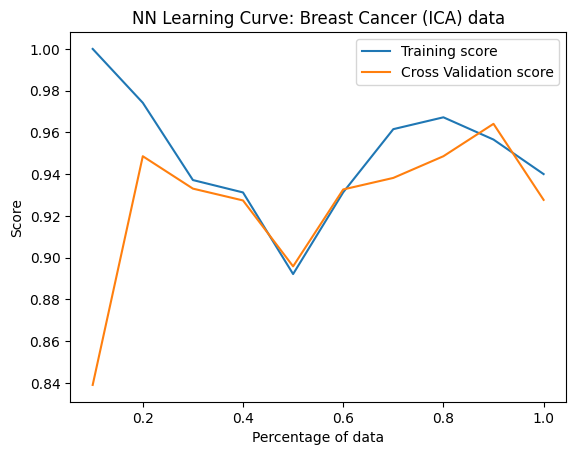

In [427]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 37, hidden_layer_sizes = (14), max_iter = 5000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
nn_clf.fit(X_ica_train, y_ica_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_clf, X_ica_train, y_ica_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('NN Learning Curve: Breast Cancer (ICA) data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P4_ICA_LC.png')
plt.show()

In [266]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 37, hidden_layer_sizes = (14), max_iter = 5000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
init_time = time.time()
nn_clf.fit(X_ica_train, y_ica_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_ica_pred = nn_clf.predict(X_ica_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_ica_pred,y_ica_test))

Training time in seconds: 0.03758573532104492
Query time in seconds: 0.0002739429473876953
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



# NN on RP transformed data

In [267]:
cnn = MLPClassifier(random_state=12345, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,15,1), "learning_rate_init": [0.001,0.01,1]}
cnn_best = GridSearchCV(cnn, param_grid=param_grid, scoring = 'recall',cv=5,n_jobs=4)

start_time = time.time()
cnn_best.fit(X_RP_train, y_RP_train)
end_time = time.time()
time_gs = end_time-start_time
print("Best params for neural network:",cnn_best.best_params_)
print("Time to train for Grid Search:",time_gs)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 7, 'learning_rate_init': 1}
Time to train for Grid Search: 40.504929065704346


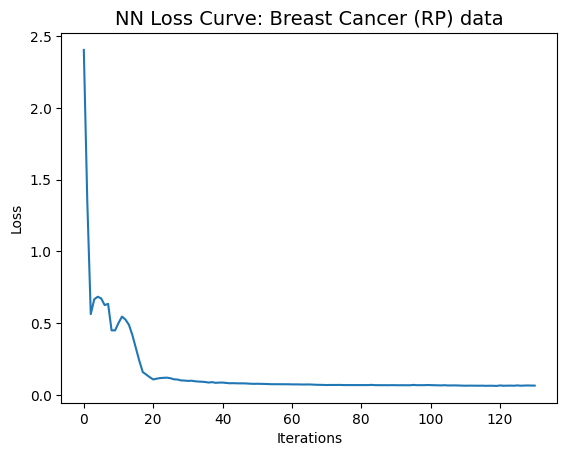

In [428]:
nn_clf1 = MLPClassifier(random_state = 45, hidden_layer_sizes = (7), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
#X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)
nn_clf1.fit(X_RP_train, y_RP_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer (RP) data", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P4_RP_loss.png')
plt.show()



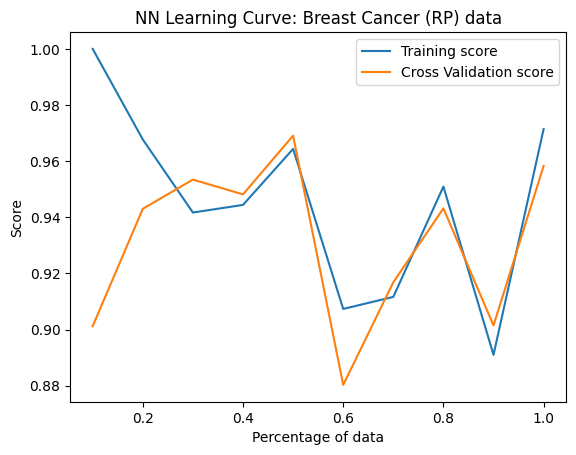

In [429]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 45, hidden_layer_sizes = (7), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
nn_clf.fit(X_RP_train, y_RP_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_clf, X_RP_train, y_RP_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('NN Learning Curve: Breast Cancer (RP) data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P4_RP_LC.png')
plt.show()

In [276]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 45, hidden_layer_sizes = (7), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
init_time = time.time()
nn_clf.fit(X_RP_train, y_RP_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_RP_pred = nn_clf.predict(X_RP_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_RP_pred,y_RP_test))

Training time in seconds: 0.0179440975189209
Query time in seconds: 0.0005590915679931641
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        94
           1       0.89      0.98      0.93        43

    accuracy                           0.96       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



# NN on Feature Selection transformed data

In [277]:
cnn = MLPClassifier(random_state=12345, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,15,1), "learning_rate_init": [0.001,0.01,1]}
cnn_best = GridSearchCV(cnn, param_grid=param_grid, scoring = 'recall',cv=5,n_jobs=4)

start_time = time.time()
cnn_best.fit(X_fs_train, y_fs_train)
end_time = time.time()
time_gs = end_time-start_time
print("Best params for neural network:",cnn_best.best_params_)
print("Time to train for Grid Search:",time_gs)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 11, 'learning_rate_init': 1}
Time to train for Grid Search: 44.448378801345825


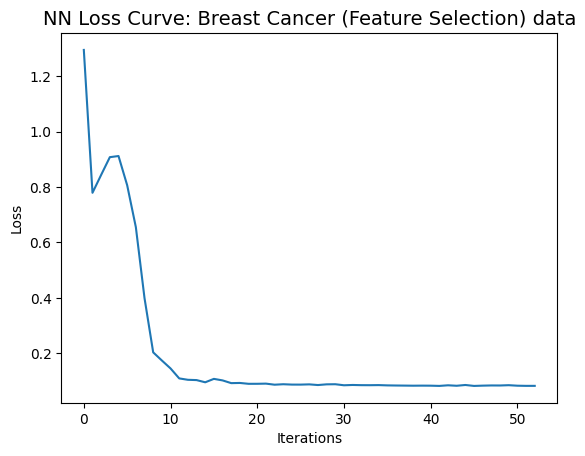

In [430]:
nn_clf1 = MLPClassifier(random_state = 41, hidden_layer_sizes = (11), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
#X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)
nn_clf1.fit(X_fs_train, y_fs_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer (Feature Selection) data", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P4_FS_loss.png')
plt.show()



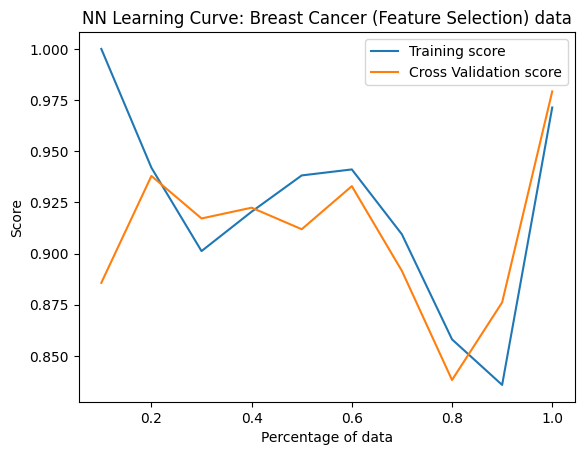

In [431]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 41, hidden_layer_sizes = (11), max_iter = 2000, 
                       alpha = 0.001, learning_rate_init = 1, solver = 'adam')
nn_clf.fit(X_fs_train, y_fs_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_clf, X_fs_train, y_fs_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('NN Learning Curve: Breast Cancer (Feature Selection) data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P4_FS_LC.png')
plt.show()

In [295]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 41, hidden_layer_sizes = (7,2), max_iter = 2000, 
                       alpha = 10, learning_rate_init = 0.01)
init_time = time.time()
nn_clf.fit(X_fs_train, y_fs_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_fs_pred = nn_clf.predict(X_fs_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_fs_pred,y_fs_test))

Training time in seconds: 0.2285749912261963
Query time in seconds: 0.0007510185241699219
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        92
           1       0.94      0.98      0.96        45

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



# Part 5: Neural Networks with Clustering

In [432]:
df_km = pd.DataFrame(X, columns=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])
df_em = pd.DataFrame(X, columns=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])
df_km['Class'] = y
df_km['cluster_label'] = KMeans(n_clusters=2, random_state=15).fit_predict(X)
df_em['Class'] = y
df_em['cluster_label'] = GaussianMixture(n_components=2, covariance_type='full').fit_predict(X)

In [433]:
X = df_km.drop('Class', axis = 1)
y = df_km.Class.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [232]:
cnn = MLPClassifier(random_state=12345, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,15,1), "learning_rate_init": [0.001,0.01,1]}
cnn_best = GridSearchCV(cnn, param_grid=param_grid, scoring = 'recall',cv=5,n_jobs=4)

start_time = time.time()
cnn_best.fit(X_train, y_train)
end_time = time.time()
time_gs = end_time-start_time
print("Best params for neural network:",cnn_best.best_params_)
print("Time to trainfor Grid Search:",time_gs)

Best params for neural network: {'alpha': 0.01, 'hidden_layer_sizes': 4, 'learning_rate_init': 1}
Time to trainfor Grid Search: 45.52462387084961


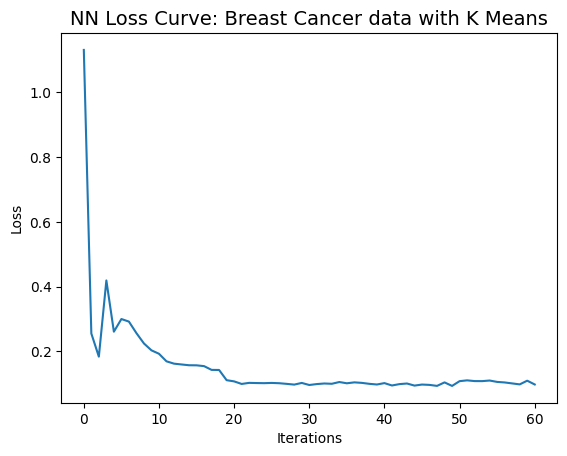

In [435]:
nn_clf1 = MLPClassifier(random_state = 45, hidden_layer_sizes = (4,), max_iter = 2000, 
                       alpha = 0.01, learning_rate_init = 1, solver = 'adam')
nn_clf1.fit(X_train, y_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer data with K Means", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P5_KM_loss.png')
plt.show()

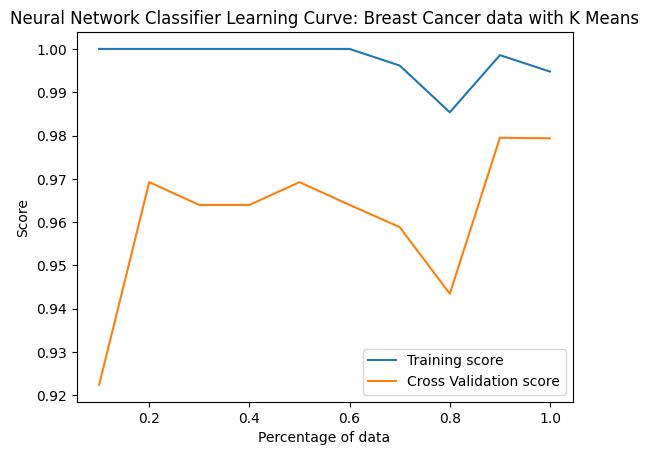

In [436]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 45, hidden_layer_sizes = (4,), max_iter = 2000, alpha = 0.01, learning_rate_init = 1)
nn_clf.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
#train_data_size = [100,200,300,400,436]
_, train_scores, cv_scores = learning_curve(nn_clf, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Breast Cancer data with K Means')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P5_KM_LC.png')
plt.show()

In [241]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 45, hidden_layer_sizes = (4,), max_iter = 2000, 
                       alpha = 0.01, learning_rate_init = 1)
init_time = time.time()
nn_clf.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = nn_clf.predict(X_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_pred,y_test))

Training time in seconds: 0.05401110649108887
Query time in seconds: 0.0018868446350097656
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        87
           1       1.00      0.94      0.97        50

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137



In [437]:
X = df_em.drop('Class', axis = 1)
y = df_em.Class.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [243]:
cnn = MLPClassifier(random_state=12345, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,15,1), "learning_rate_init": [0.001,0.01,1]}
cnn_best = GridSearchCV(cnn, param_grid=param_grid, scoring = 'recall',cv=5,n_jobs=4)

start_time = time.time()
cnn_best.fit(X_train, y_train)
end_time = time.time()
time_gs = end_time-start_time
print("Best params for neural network:",cnn_best.best_params_)
print("Time to trainfor Grid Search:",time_gs)

Best params for neural network: {'alpha': 0.1, 'hidden_layer_sizes': 4, 'learning_rate_init': 1}
Time to trainfor Grid Search: 43.443114042282104


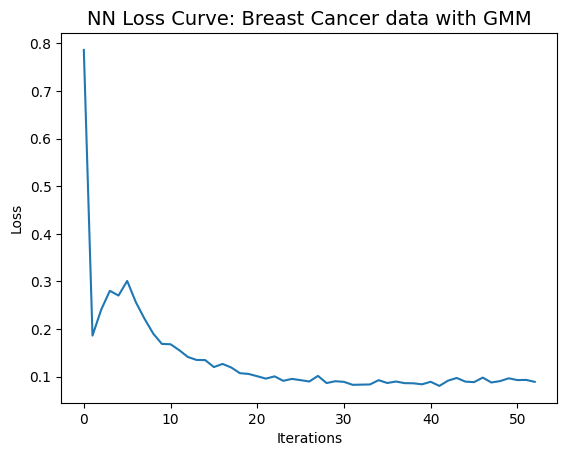

In [438]:
nn_clf1 = MLPClassifier(random_state = 36, hidden_layer_sizes = (4), max_iter = 2000, 
                       alpha = 0.1, learning_rate_init = 1, solver = 'adam')
nn_clf1.fit(X_train, y_train)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer data with GMM", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/BC_P5_EM_loss.png')
plt.show()

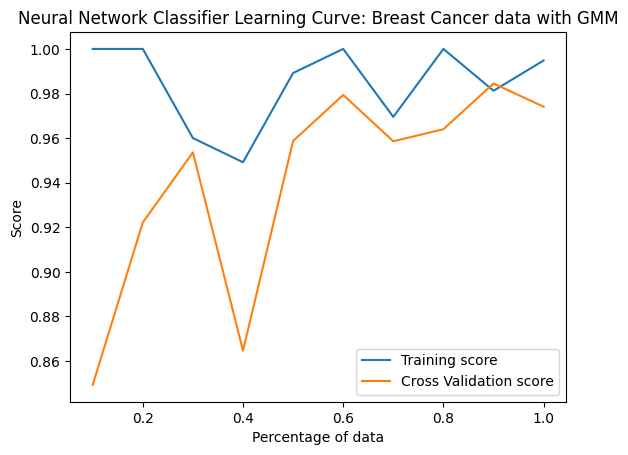

In [439]:
# Learning Curve for NN
nn_clf = MLPClassifier(random_state = 36, hidden_layer_sizes = (4), max_iter = 2000, alpha = 0.1, learning_rate_init = 1)
nn_clf.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
#train_data_size = [100,200,300,400,436]
_, train_scores, cv_scores = learning_curve(nn_clf, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Breast Cancer data with GMM')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/BC_P5_EM_LC.png')
plt.show()

In [248]:
# Training & Predicting time 
nn_clf = MLPClassifier(random_state = 36, hidden_layer_sizes = (4), max_iter = 2000, 
                       alpha = 0.1, learning_rate_init = 1)
init_time = time.time()
nn_clf.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = nn_clf.predict(X_test)
print("Query time in seconds:", time.time() - init_time)
print("Classification report:")
print(classification_report(y_pred,y_test)) 

Training time in seconds: 0.051297903060913086
Query time in seconds: 0.0012848377227783203
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.98      0.94      0.96        49

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137

